In [31]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings....
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Reading the csv files...
df=pd.read_csv('Auto_Insurance_Claim.csv')
df

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


# Understanding the Data                

1) Features/Attributes:               
   >> Customer                         
Country                          
State Code                       
State                                        
Response                         
Coverage                         
Education                        
Effective To Date                
EmploymentStatus                 
Gender                           
Income                           
Location Code                    
Marital Status                   
Monthly Premium Auto             
Months Since Last Claim          
Months Since Policy Inception    
Number of Open Complaints        
Number of Policies               
Policy Type                      
Policy                           
Claim Reason                     
Sales Channel                    
Total Claim Amount               
Vehicle Class                    
Vehicle Size                     

2) Target:                           
   >> Claim Amount                         

3) We have to predict the Claim Amount.                            
4) As we can see that the data is continuous thus i will use Regression models to train the model.                  

In [33]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 9136 rows and 26 columns.
df.shape

(9134, 26)

In [34]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,US,IA,Iowa,825.629780,Yes,Basic,Bachelor,1/25/11,Employed,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,US,IA,Iowa,538.089864,Yes,Basic,College,2/24/11,Employed,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,US,NE,Nebraska,721.610031,No,Premium,Master,1/18/11,Unemployed,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,US,IA,Iowa,2412.750402,Yes,Basic,Bachelor,1/26/11,Medical Leave,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,US,IA,Iowa,738.817808,No,Extended,College,2/17/11,Employed,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize


In [35]:
# Dropping duplicate entries...
df.drop_duplicates(inplace=True)
df
# No duplicates entries

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [36]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

Features Information:             
1) No null data.           
2) float datatype= 2               
3) int datatype= 6              
4) object datatype= 18             

In [37]:
# Checking the null values
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [38]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in Customer are 9134 
Number of unique values in Country are 1 
Number of unique values in State Code are 5 
Number of unique values in State are 5 
Number of unique values in Claim Amount are 8041 
Number of unique values in Response are 2 
Number of unique values in Coverage are 3 
Number of unique values in Education are 5 
Number of unique values in Effective To Date are 59 
Number of unique values in EmploymentStatus are 5 
Number of unique values in Gender are 2 
Number of unique values in Income are 5694 
Number of unique values in Location Code are 3 
Number of unique values in Marital Status are 3 
Number of unique values in Monthly Premium Auto are 202 
Number of unique values in Months Since Last Claim are 36 
Number of unique values in Months Since Policy Inception are 100 
Number of unique values in Number of Open Complaints are 6 
Number of unique values in Number of Policies are 9 
Number of unique values in Policy Type are 3 
Number of unique val

In [39]:
# Statistical Features Information......
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Univariant Analysis


Claim Amount                         AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                            AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Monthly Premium Auto              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Months Since Last Claim           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Months Since Policy Inception       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number of Open Complaints        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number of Policies               AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Total Claim Amount               AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

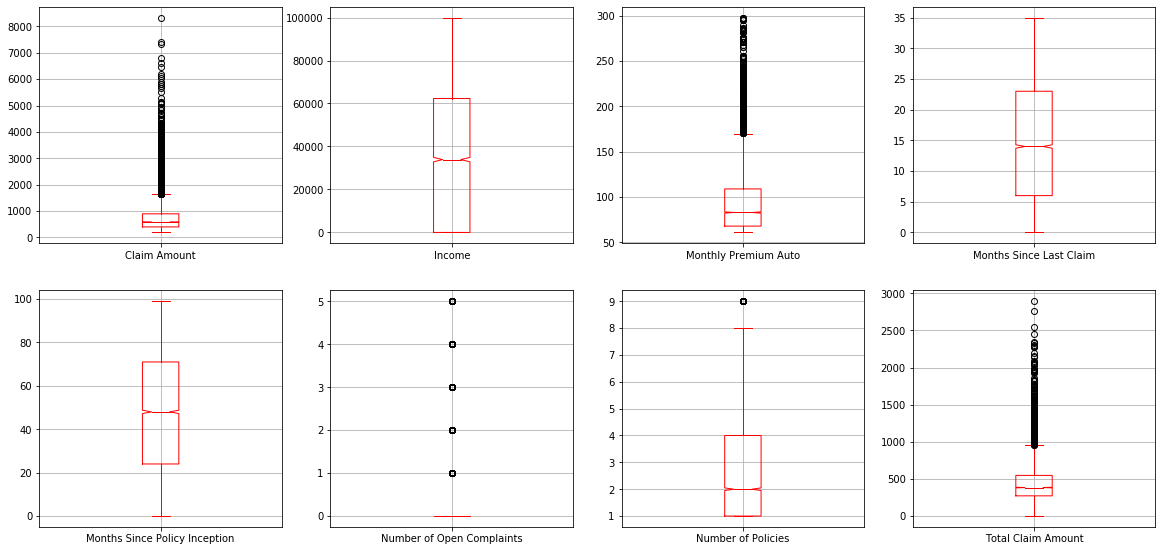

In [40]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E67942388>,
      dtype=object)

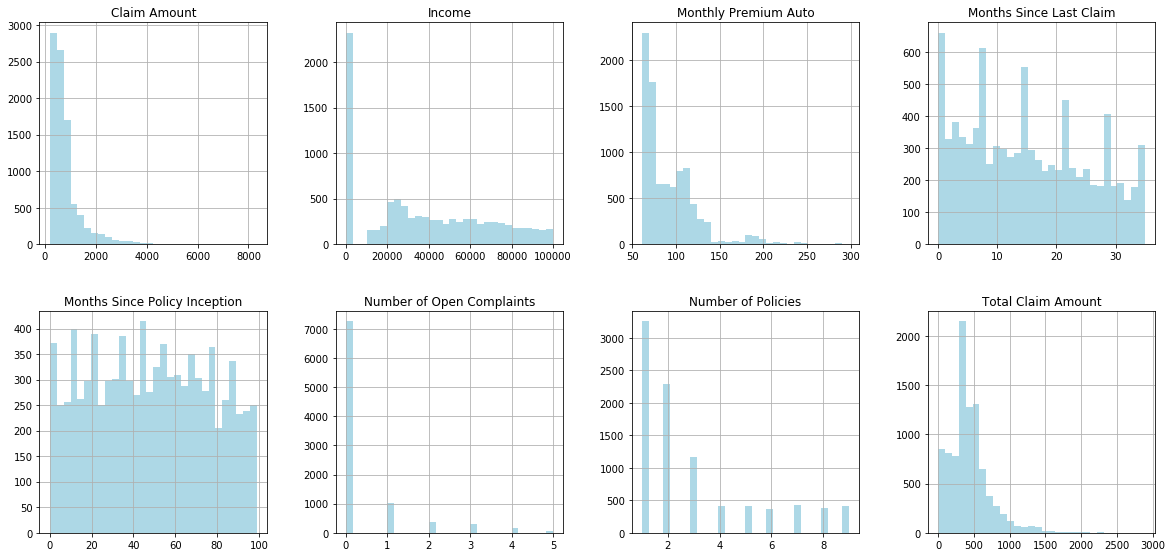

In [41]:
 #Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30,color='lightblue') 

In [42]:
# Counting number of different instances of Gender Feature...
df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

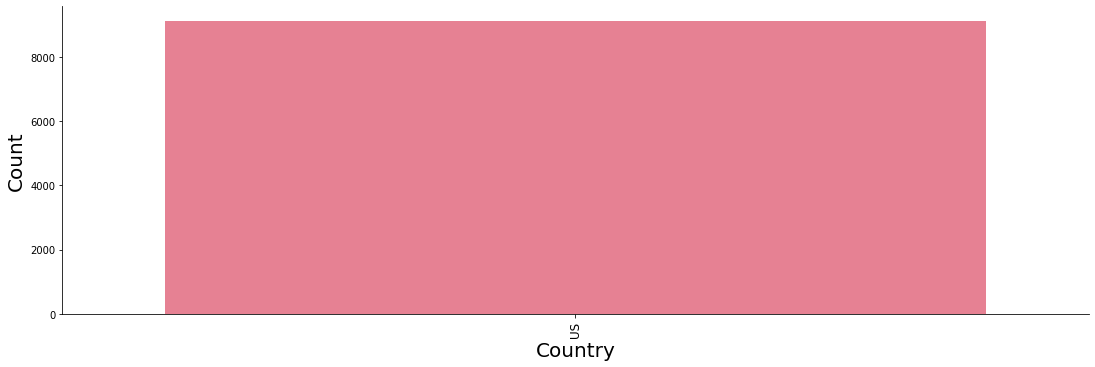

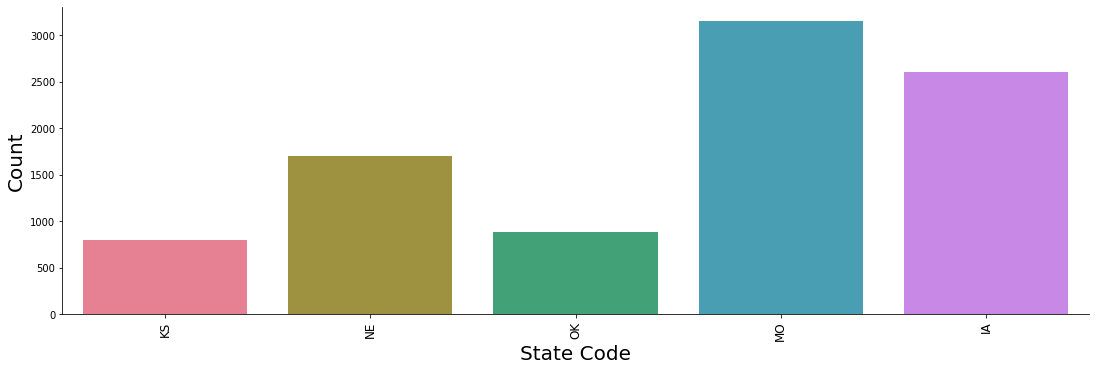

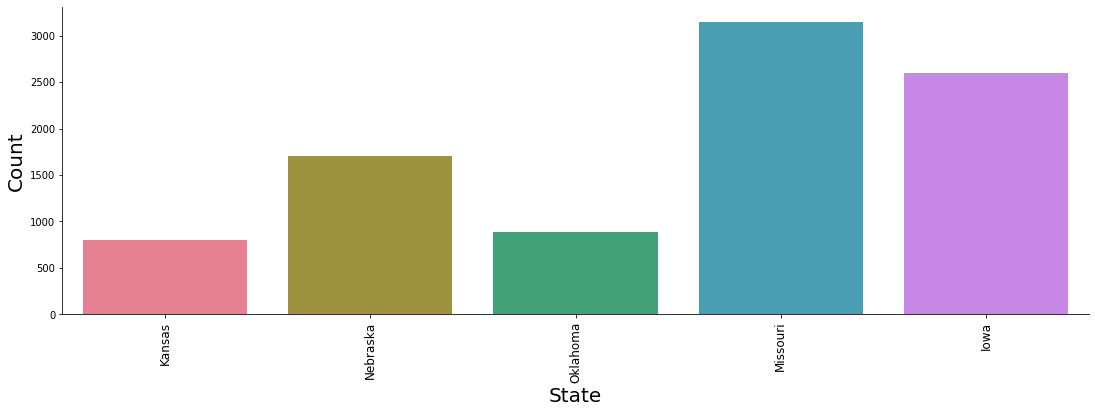

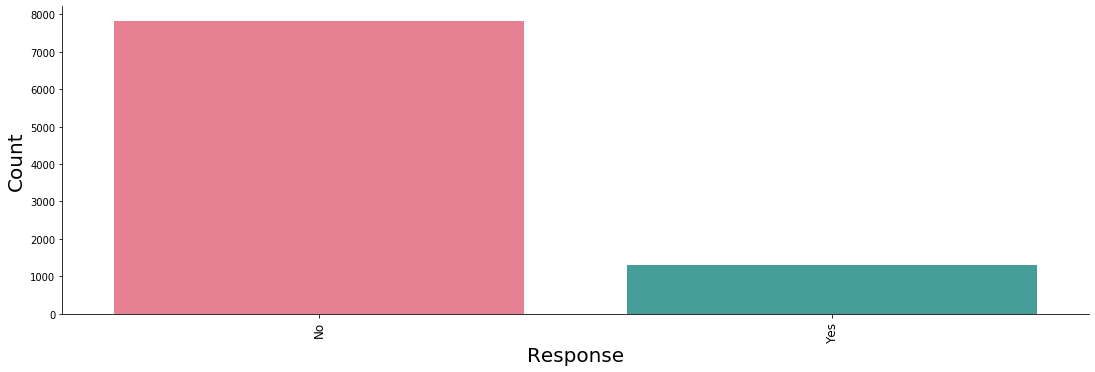

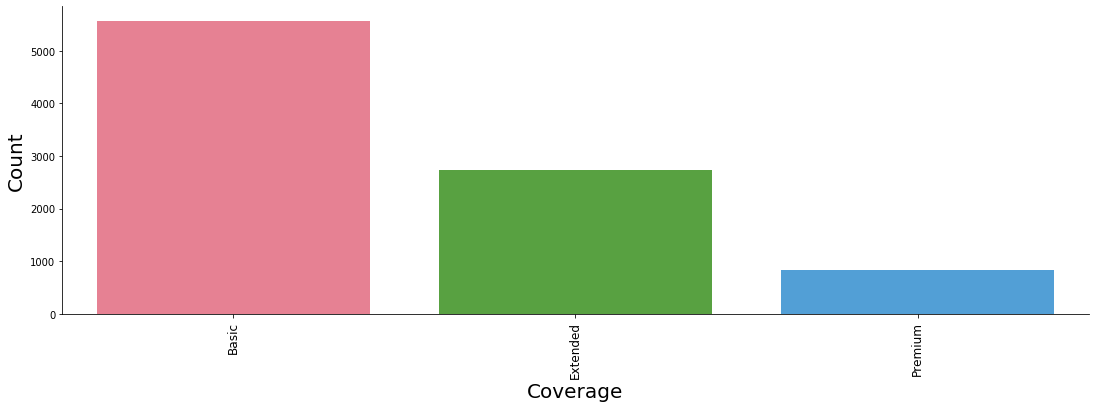

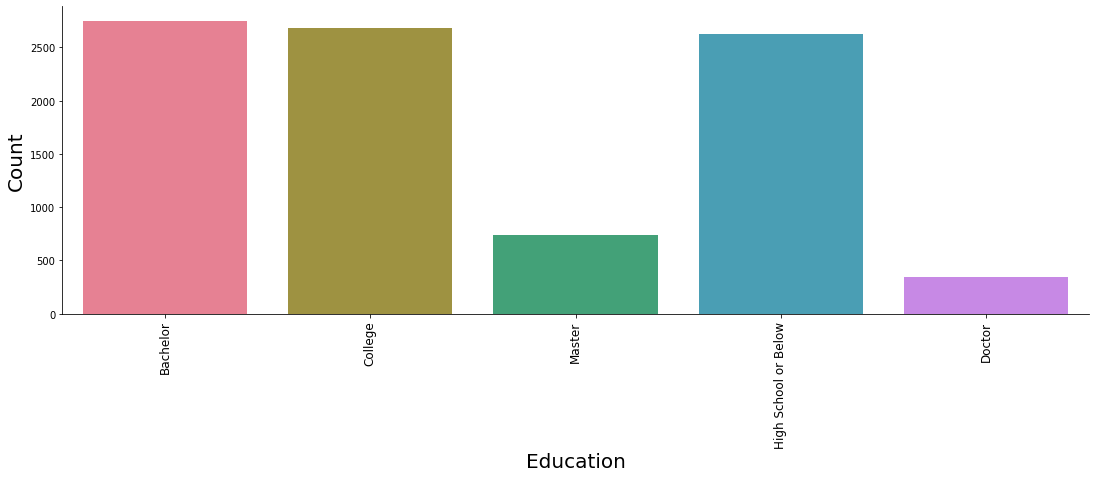

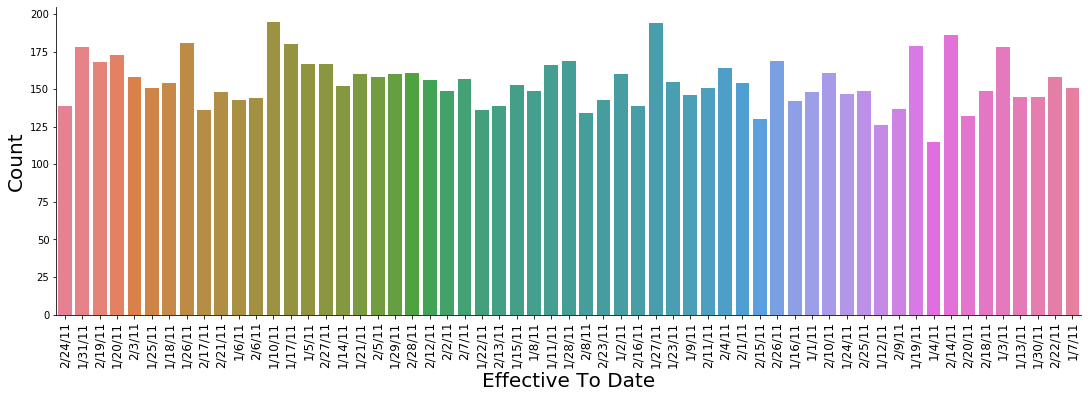

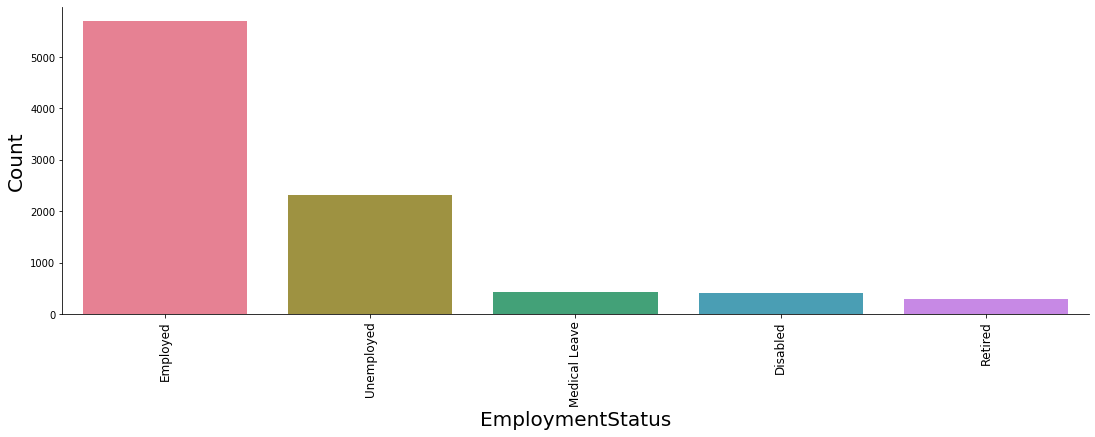

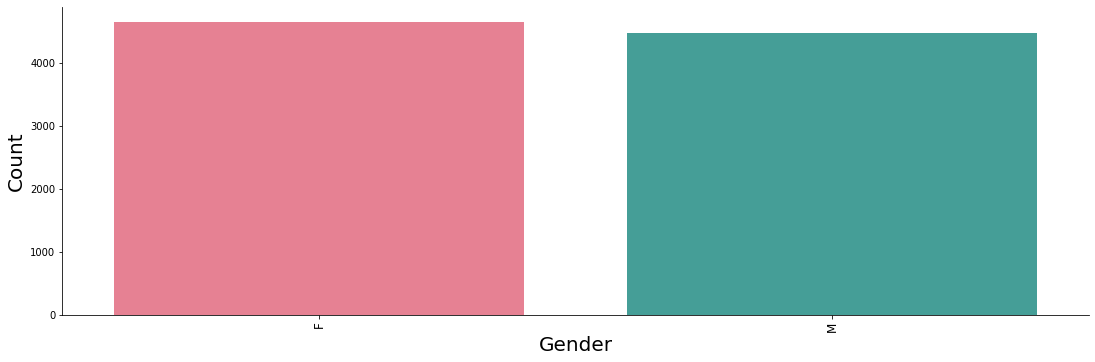

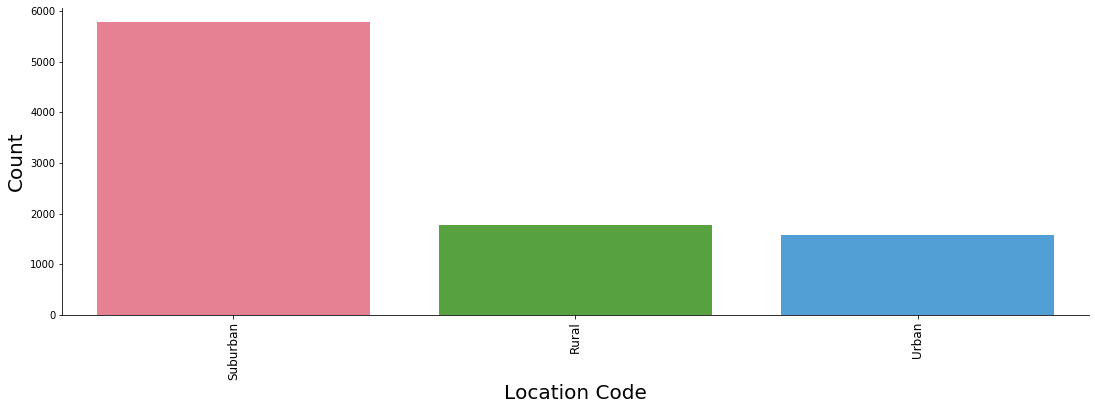

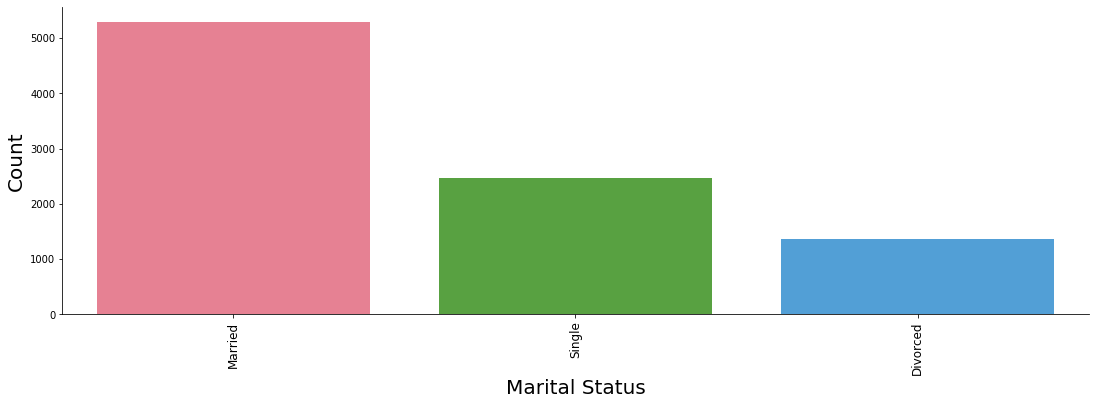

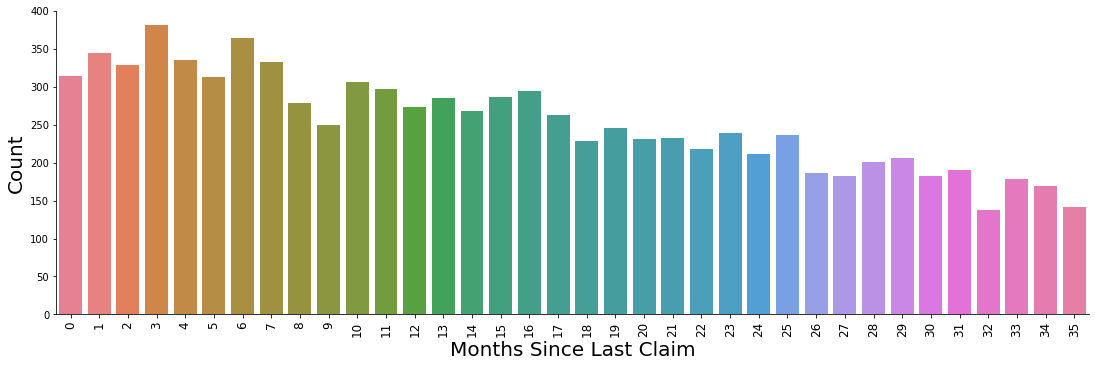

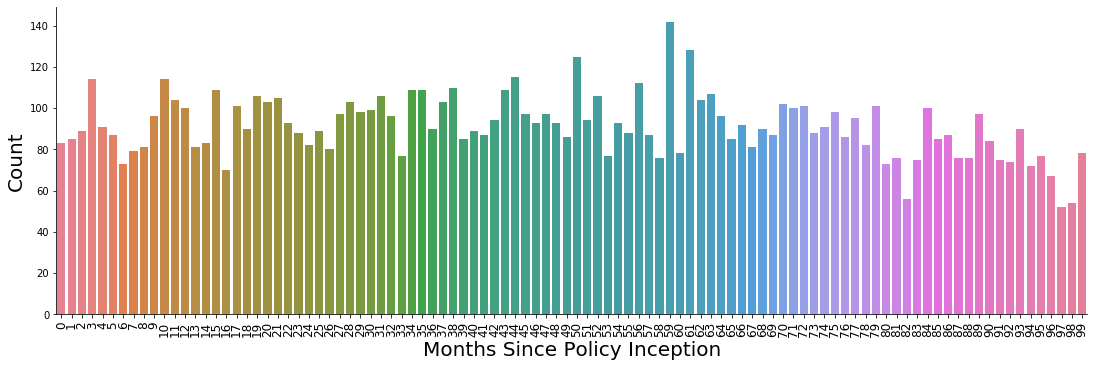

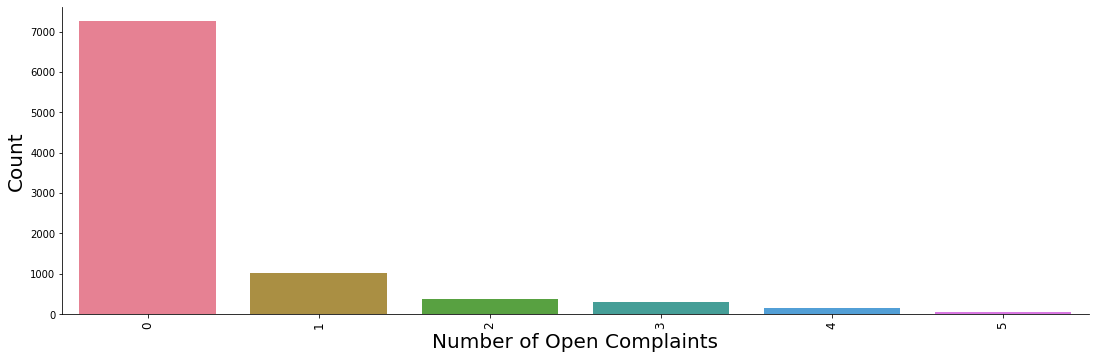

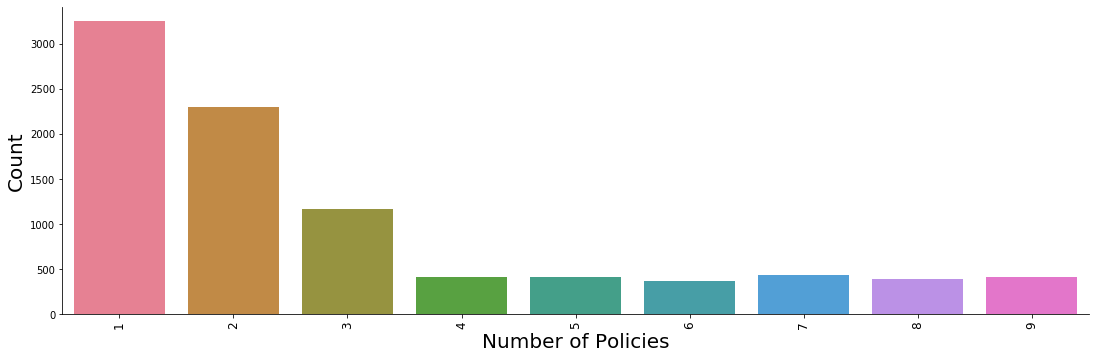

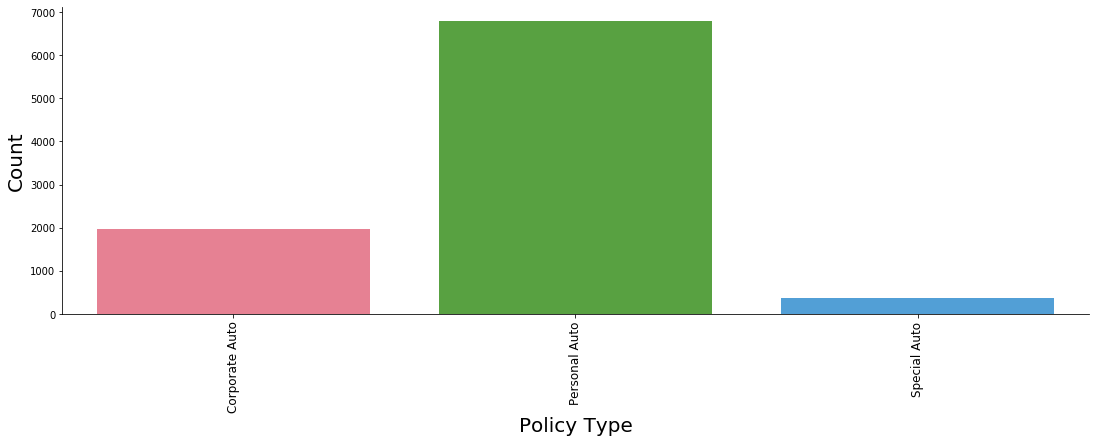

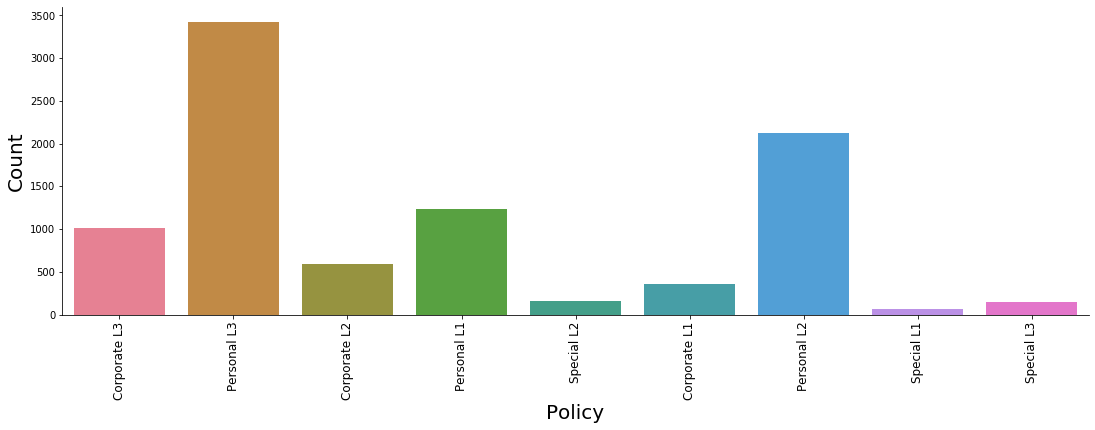

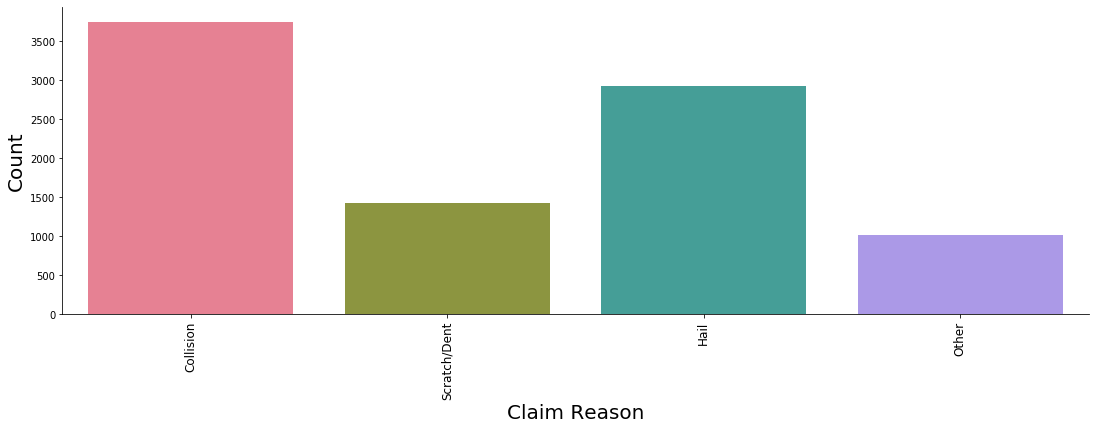

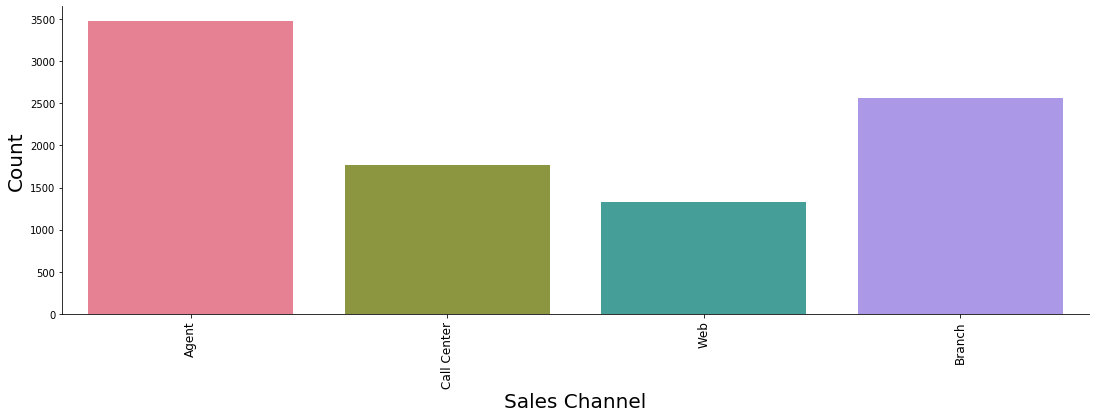

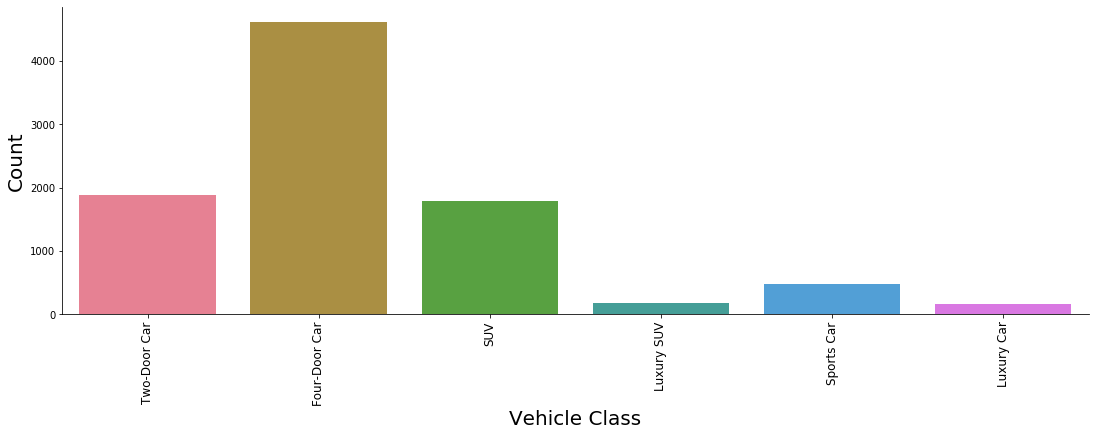

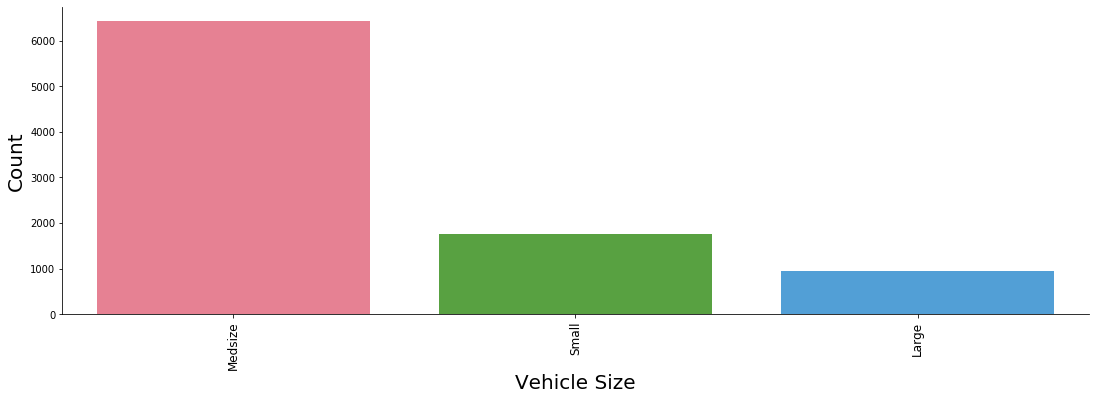

In [43]:
# For loop to plot counting Graph of Different Features.....
for i in df.drop(['Customer','Claim Amount','Total Claim Amount','Monthly Premium Auto','Income'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information From the Graph                        

1) All the persons are from US only.                       
2) More number of claims are from Missouri stae.                         
3) Number of Counts of Basic Coverage are more than Extended and Premium coverage.                      
4) Number of counts of Persons have Education= 'Bachelor' are more.                 
5) Number of counts of persons whose Employement Status is 'Employed'                    
6) Number of Female counts is more.                               
7) Number of counts for Suburban location code is more thamn rest.                     
8) Where Martial Status is Married, Number of Counts of Persons is more.                    
9) As 'Months since Last claim' increases number of person counts decreases.               
10) Insurance claimers decreases as number of policies increases.                
11) People chose Personal Auto policy more than rest.             
12) Policy L3 have more number of customers.                  
13) More number of Persons mainly claims due to 'collision'                  
14) More number of persons Take policies via Agents.                
15) More number of persons take claim for 'Four-Door-Car'.                   
16) More number of persons claims for medsize vehicle.                    

# Bivariant Analysis

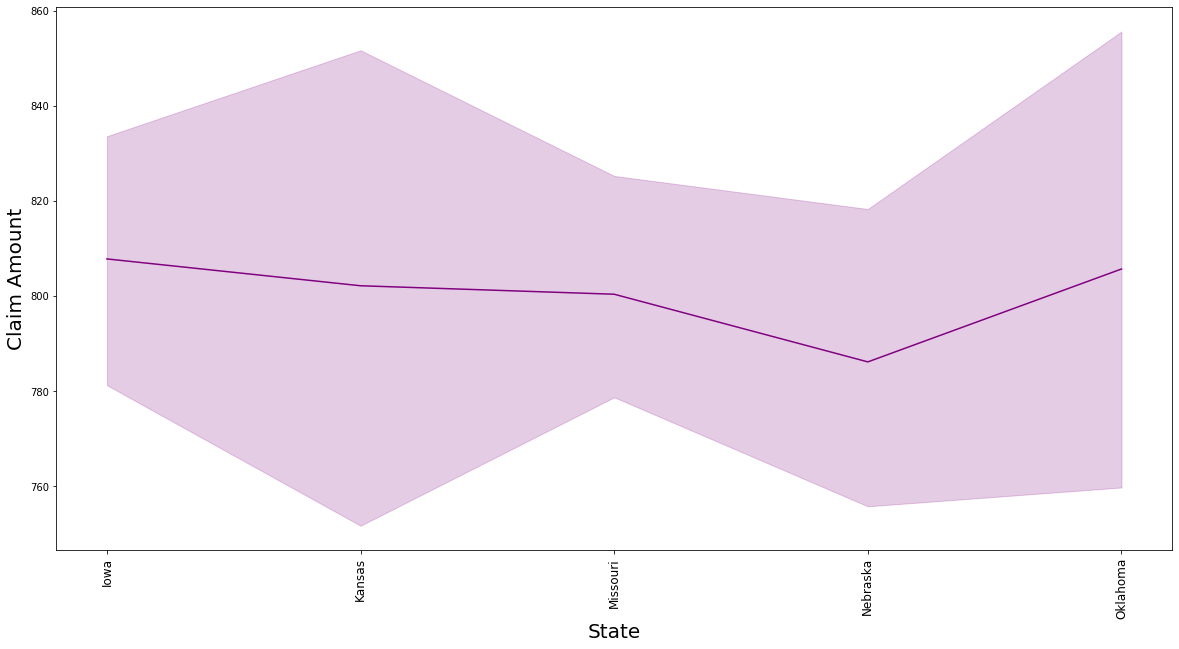

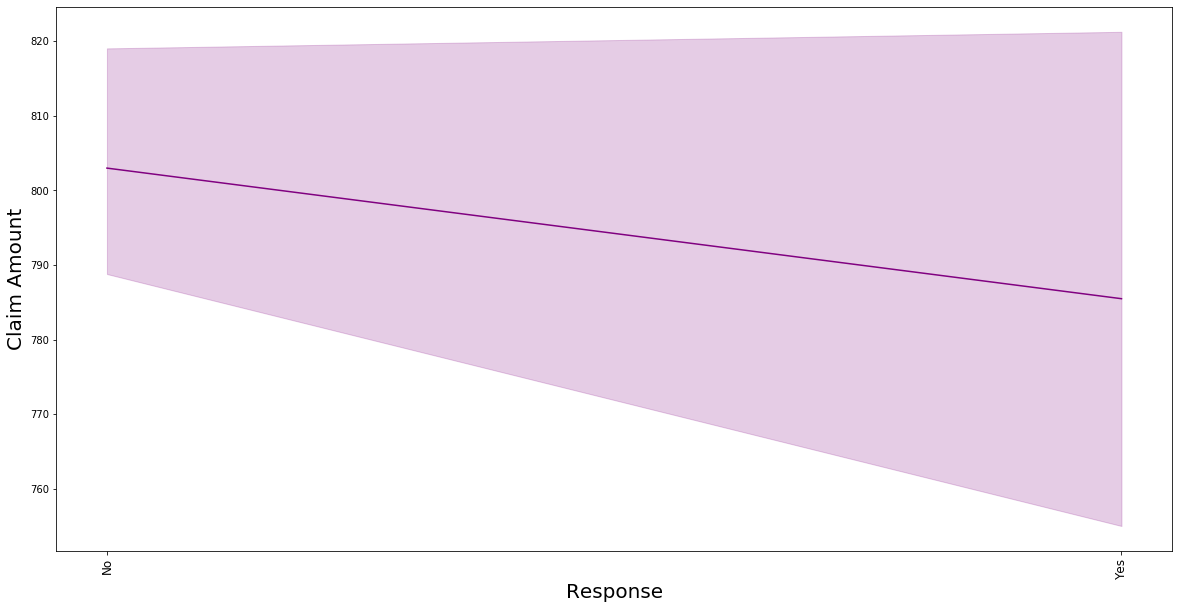

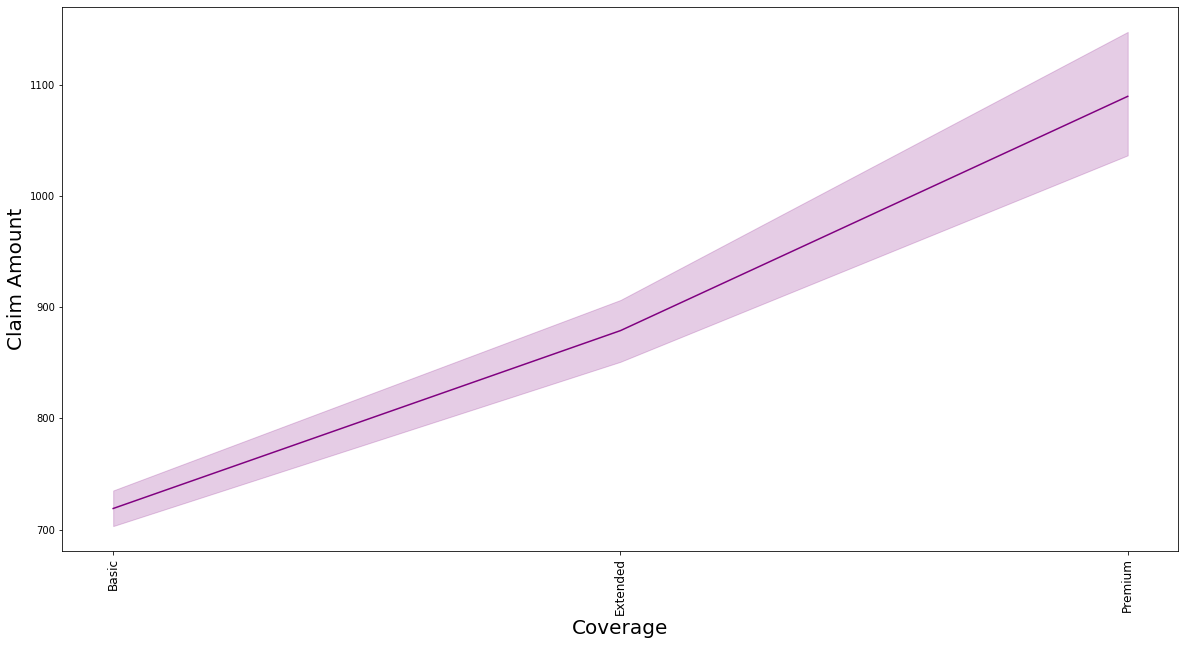

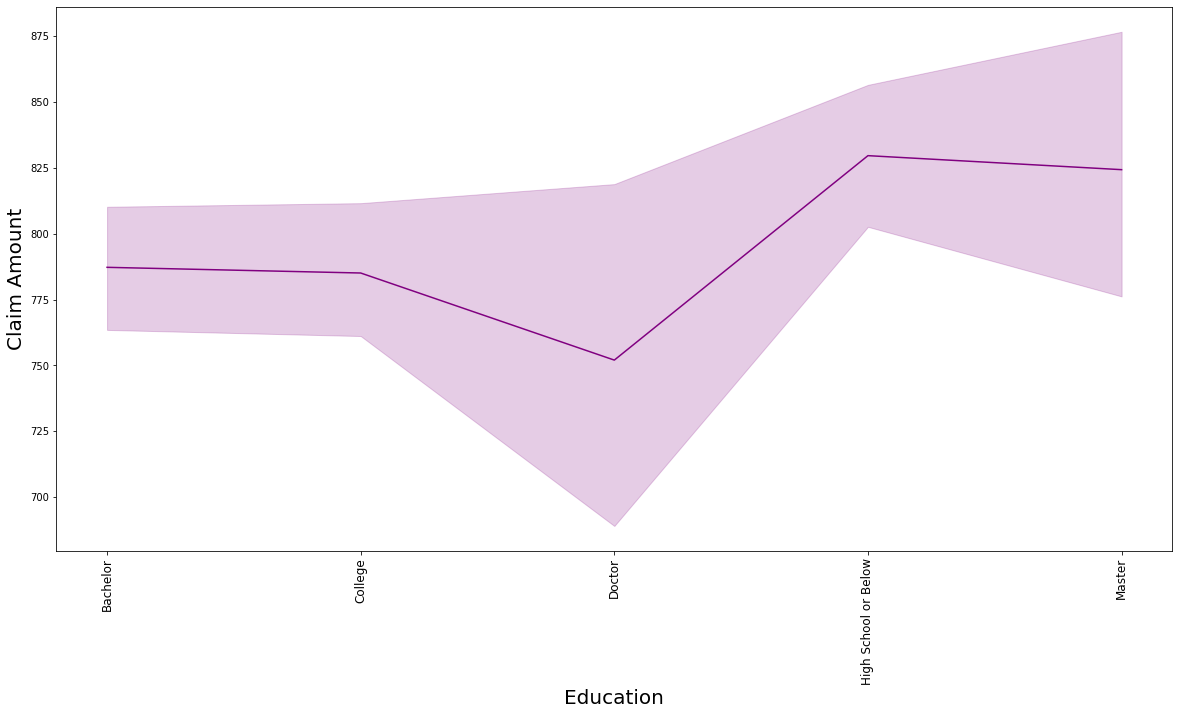

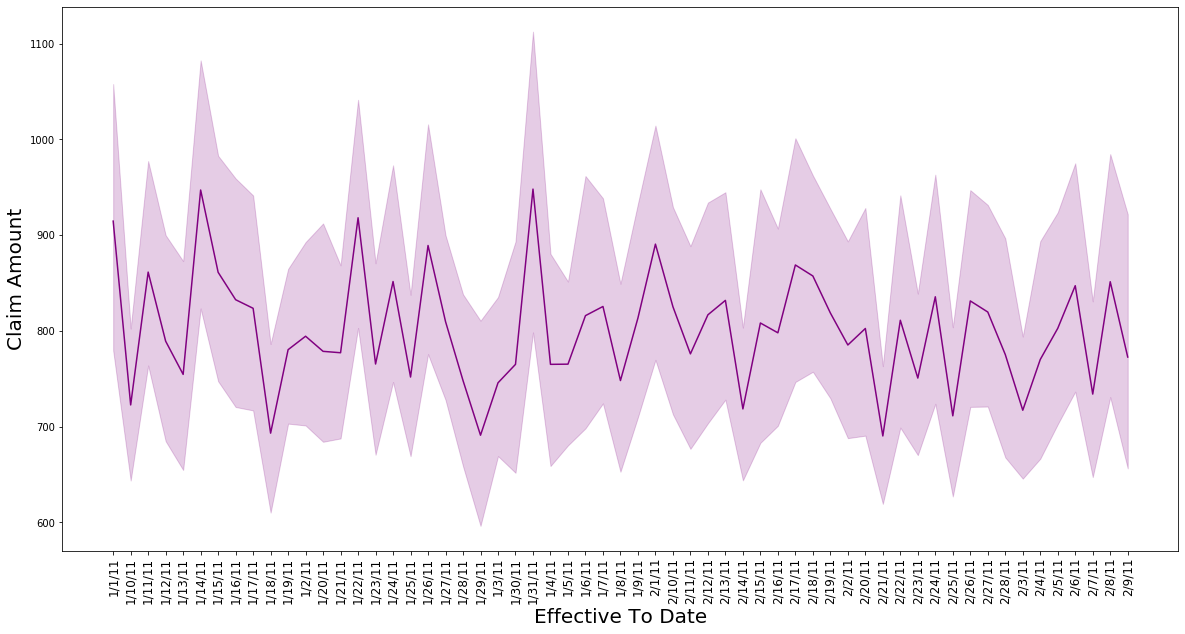

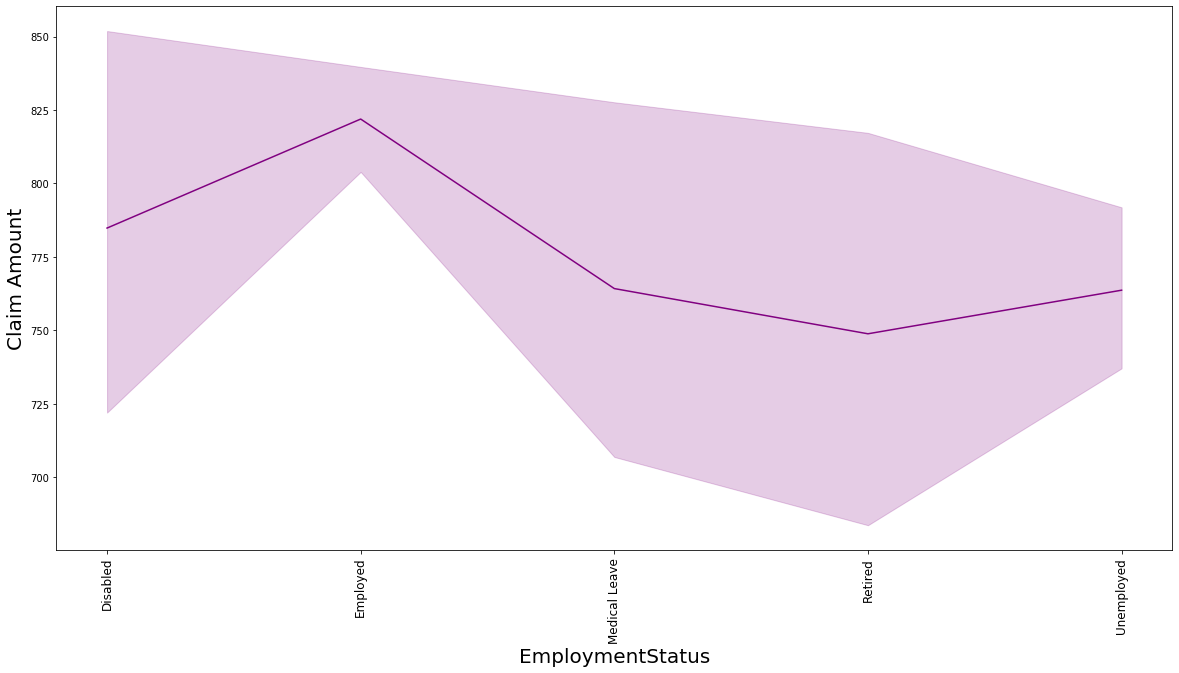

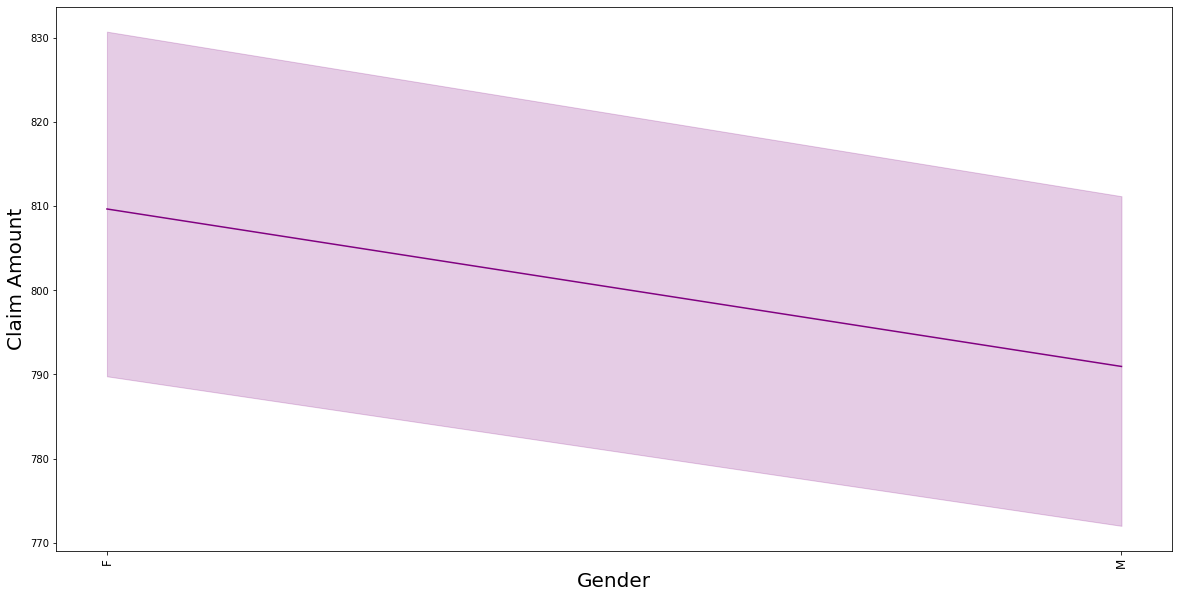

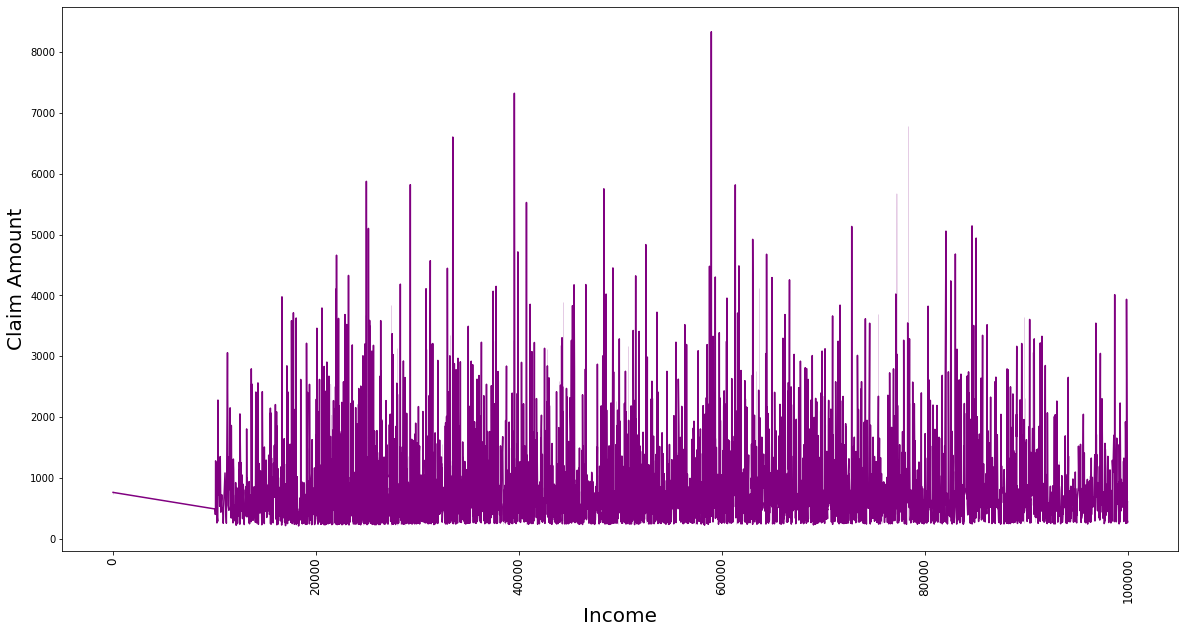

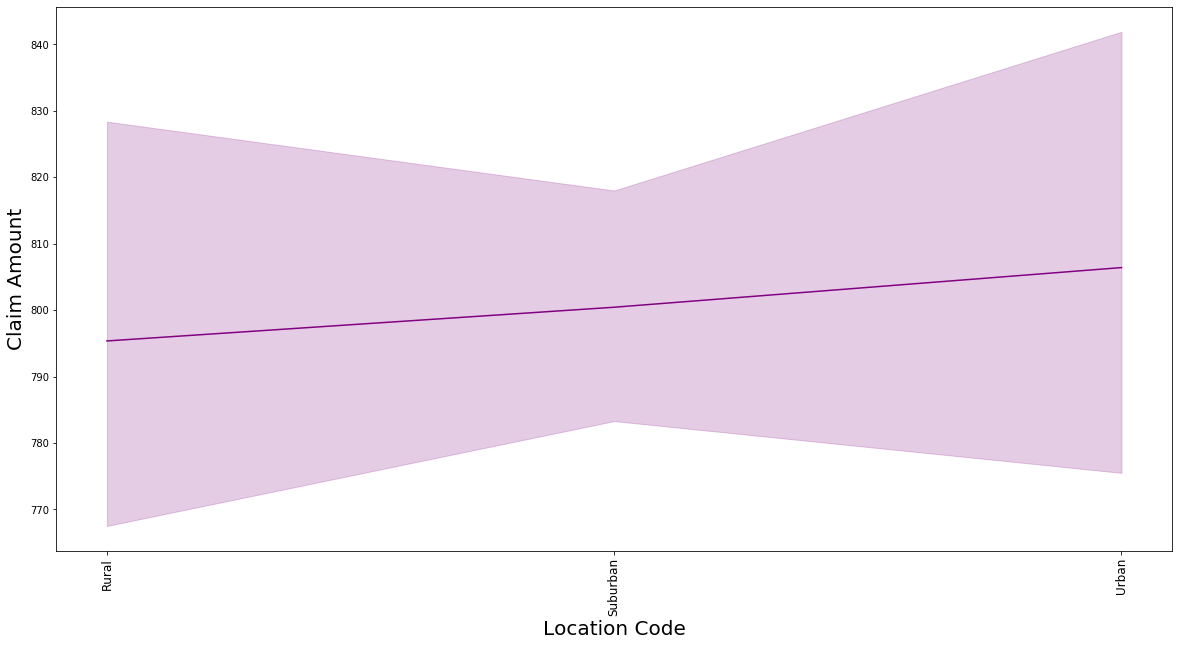

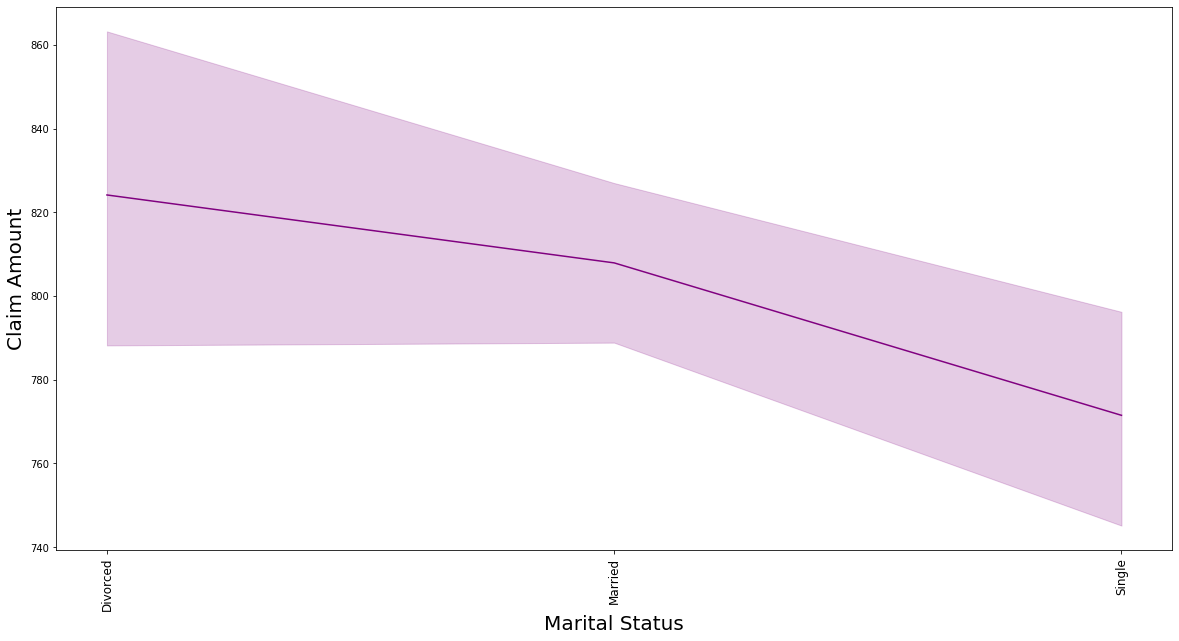

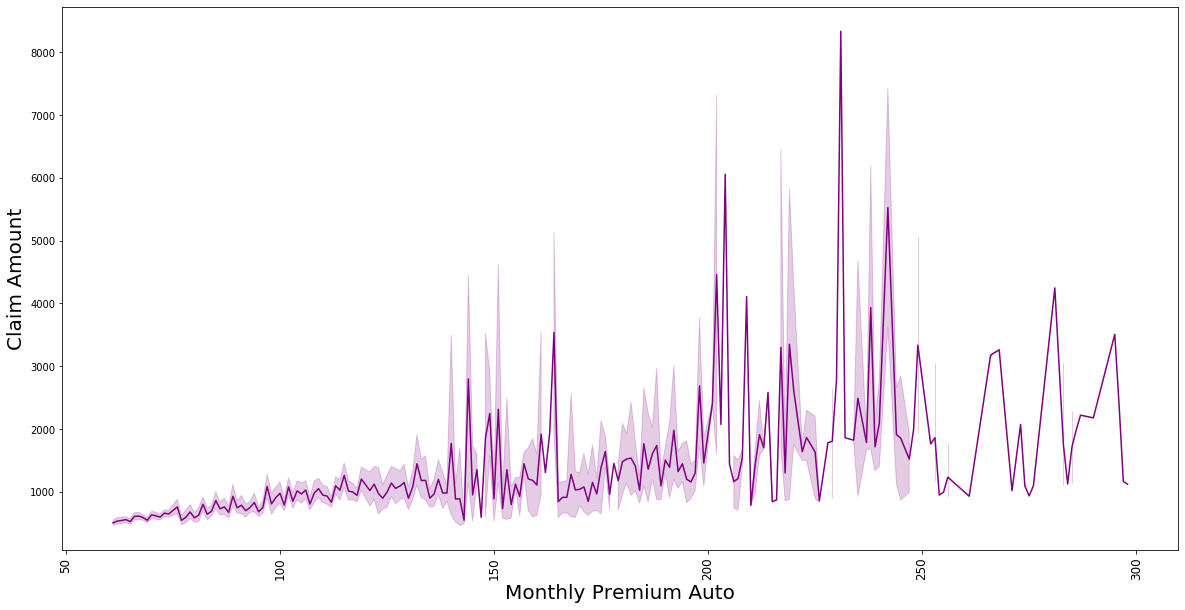

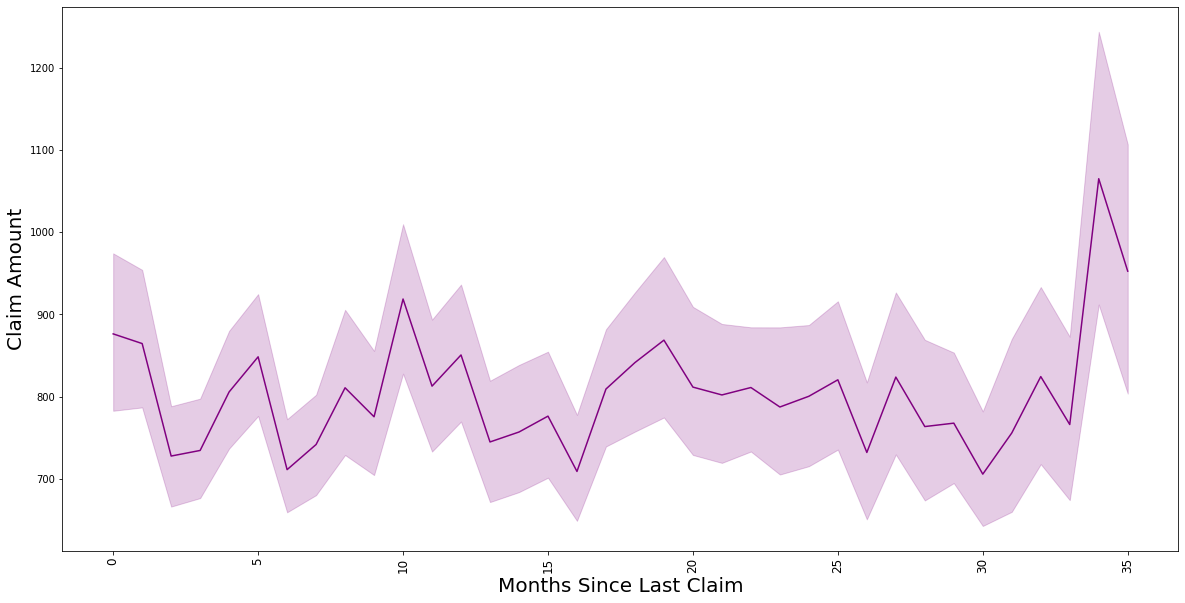

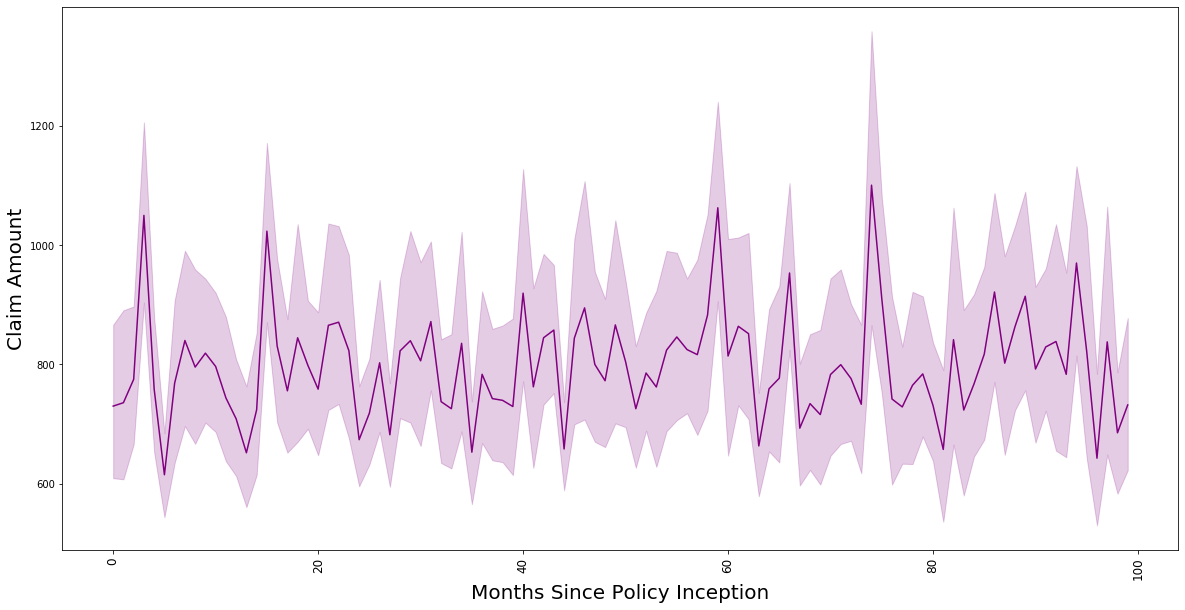

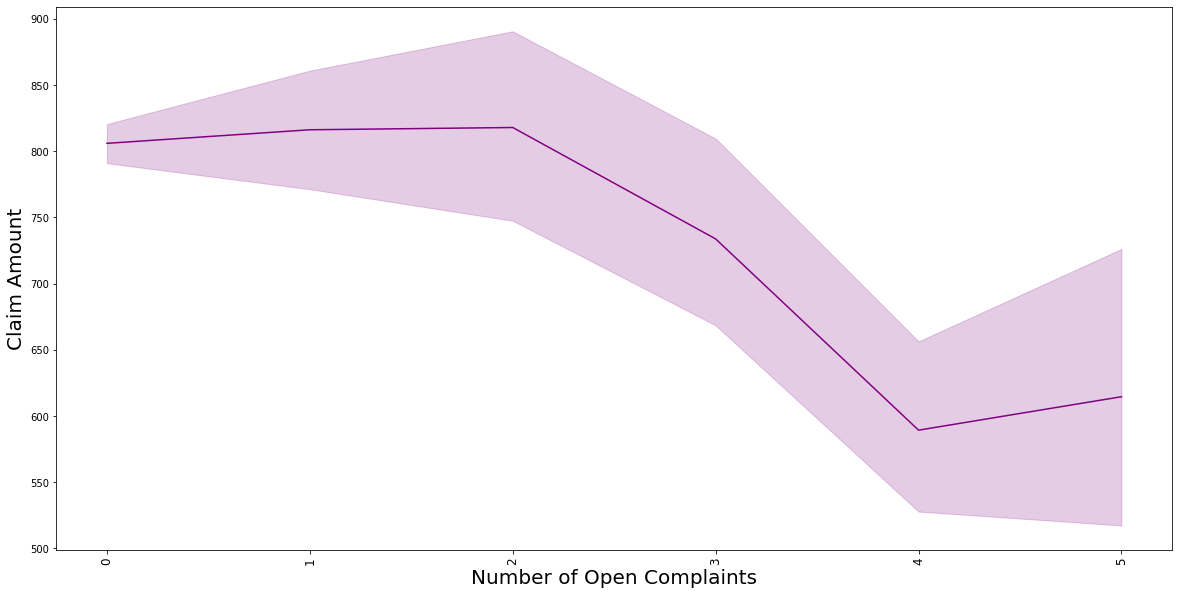

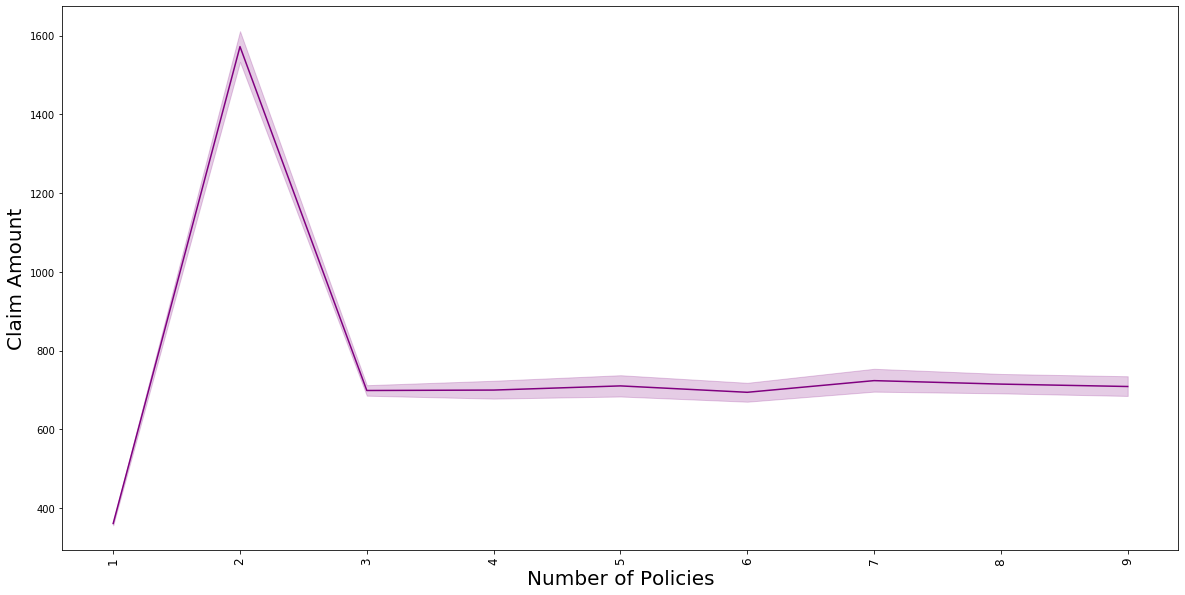

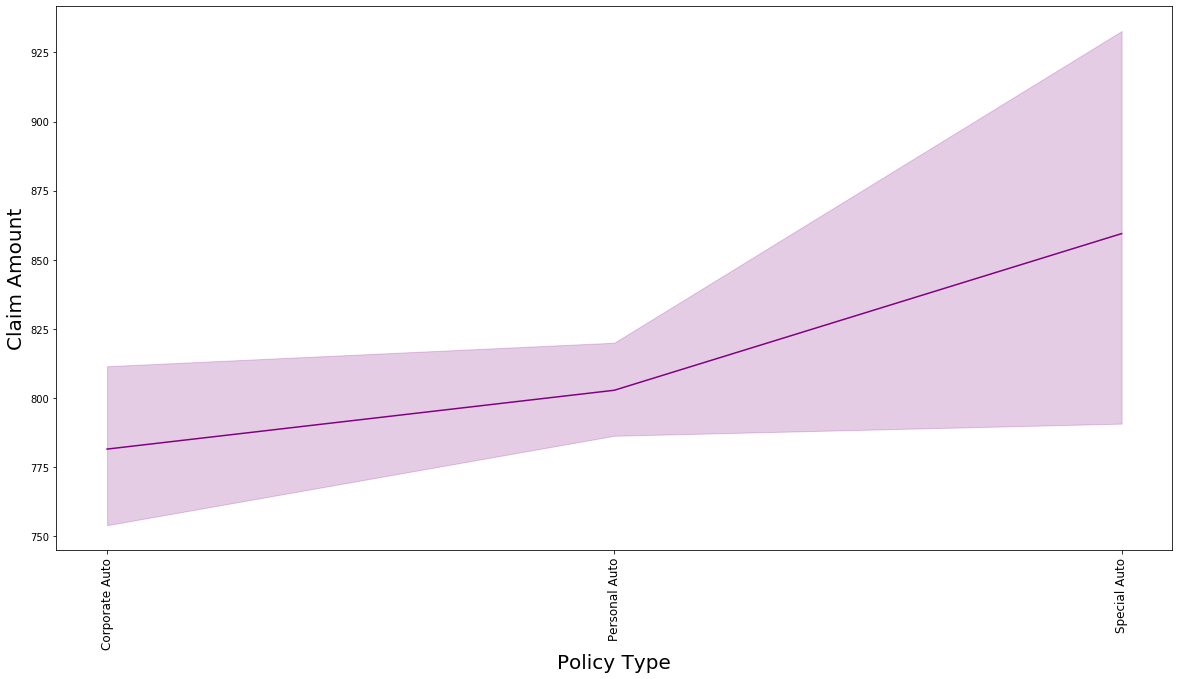

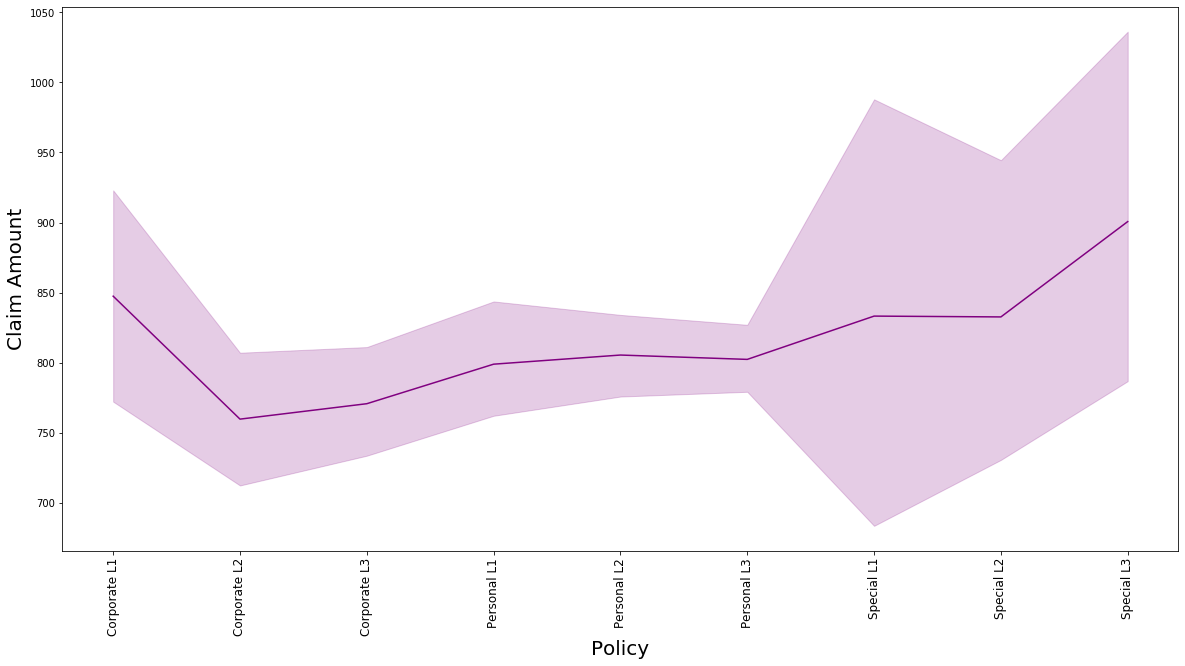

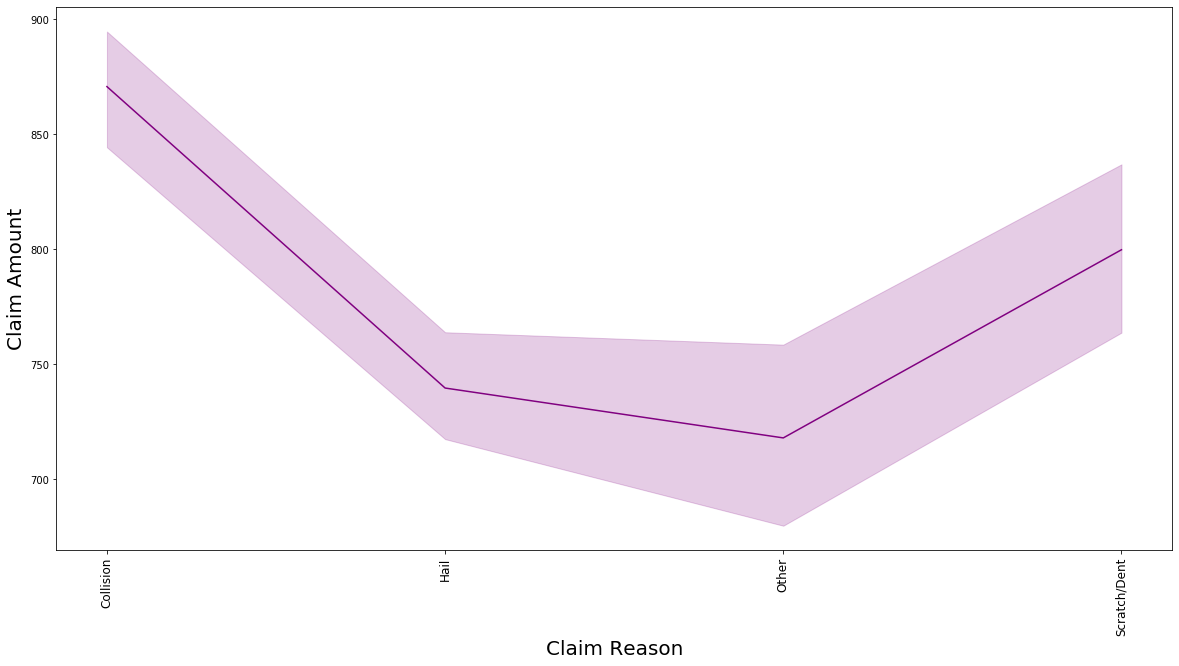

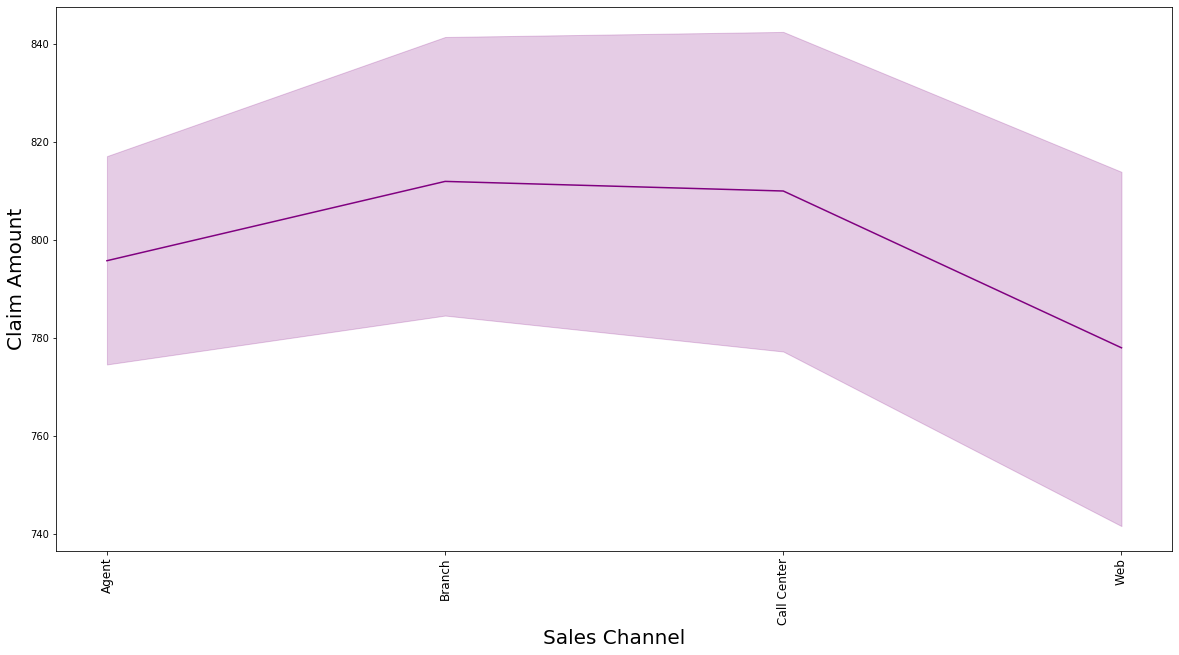

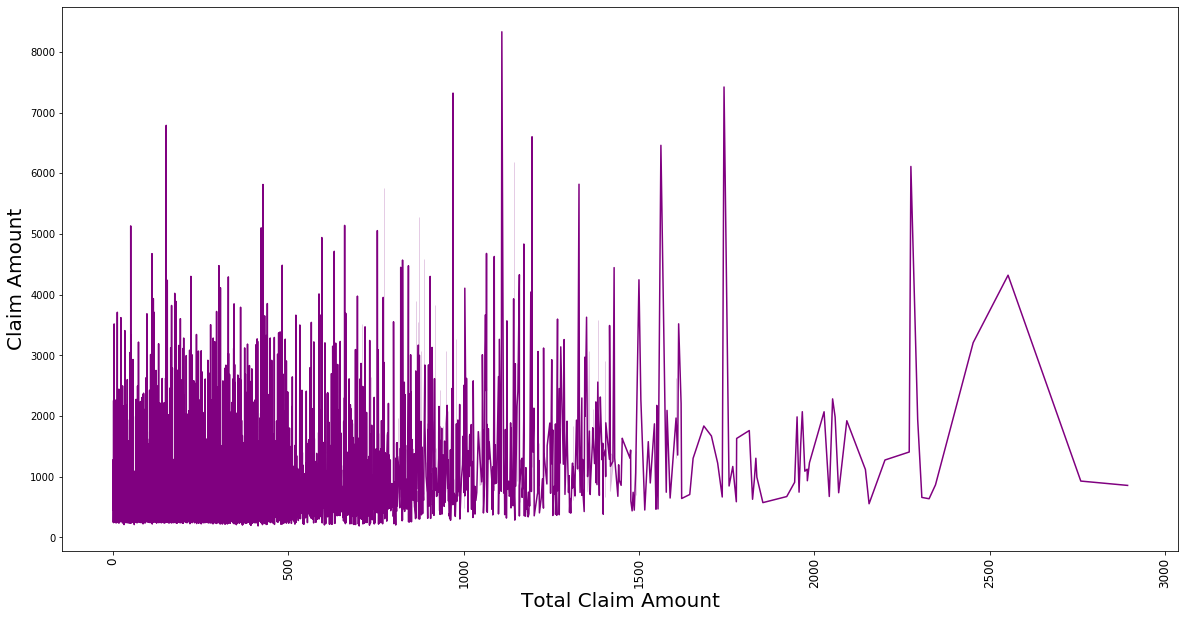

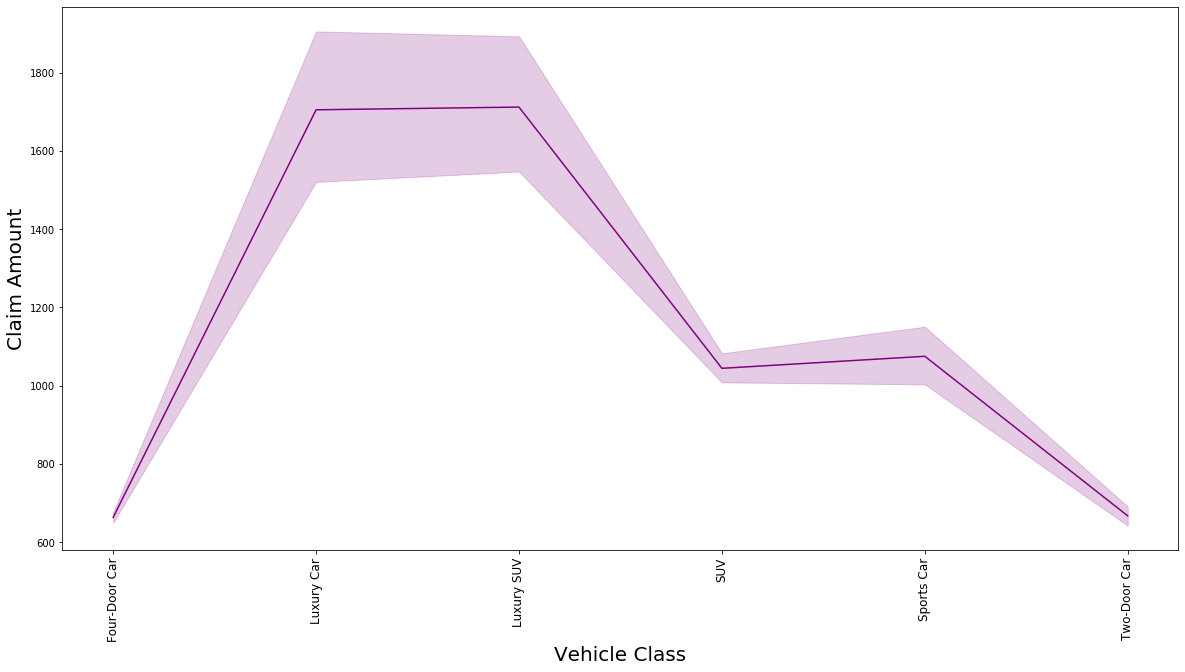

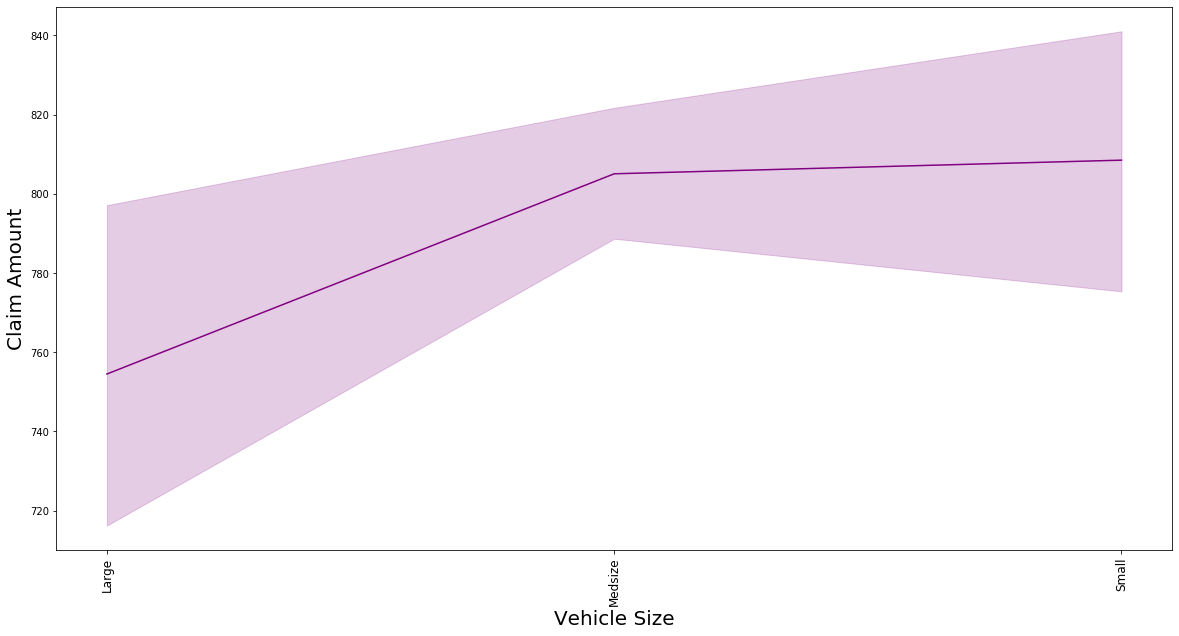

In [44]:
# For loop to plot graphs between Claim Amount and Rest Features
for i in df.drop(['Customer','Country','State Code','Claim Amount'],axis=1).columns.values:
    plt.subplots(figsize=(20,10))
    sns.lineplot(x=i,
                data=df,
                y='Claim Amount',
                color='purple')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Claim Amount',fontsize=20)
    plt.xlabel(i,fontsize=20)

#### Information from the Graph:                     

1) Oklohama state person's claims more amount.         
2) Premium Coverage have more claim amount.              
3) Education= 'High School or below' have more claim amount.            
4) Employed persons have more claim Amount.            
5) Females have more claim Amount.            
6) Urban location have more claim amount.             
7) Divorcees have more claim amount.                        
8) As monthly Premium Auto Increases Claim Amount also Increases.                
9)  As 'Months since Last claim' increases claim amount also increases.               
10) Claim Amount decreases as number of Open Complaints increases.              
11) Special L3 Auto have more claim amount.                   
12) Call Centres sales chanel have more claim amount.            
13) small vehicle size have more claim amount.       

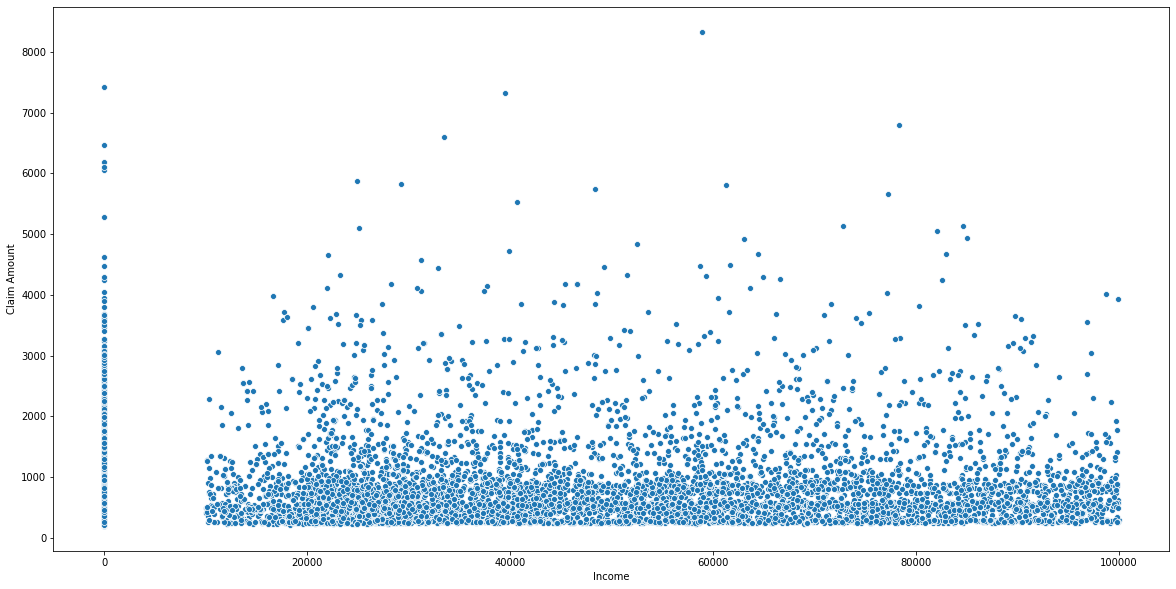

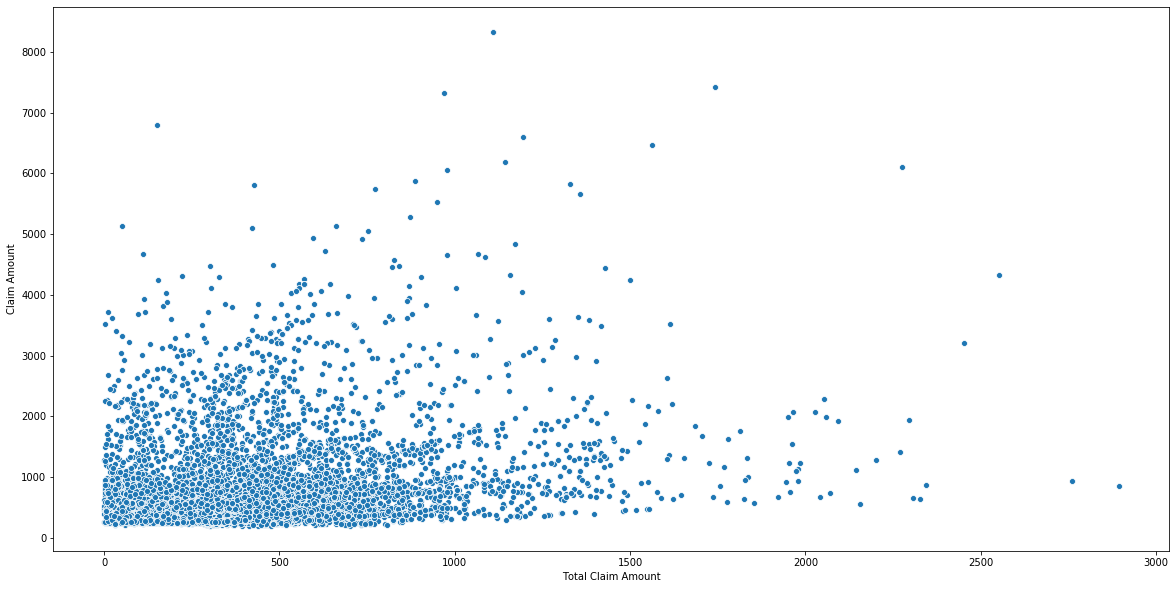

In [45]:
 # show scatter plots between displacement, weight and mpg....
for i in ["Income", "Total Claim Amount"]:
    plt.subplots(figsize=(20,10))
    sns.scatterplot(x=i, y="Claim Amount",data=df)
    plt.show()

In [46]:
# In here I'm splitting the Effective to date column and and making various features from it like:Years, Motns, Day....
def f(x):
    dfd = x.copy()
    dfd['year'] = pd.DatetimeIndex(x['Effective To Date']).year
    dfd['month'] = pd.DatetimeIndex(x['Effective To Date']).month
    dfd['day'] = pd.DatetimeIndex(x['Effective To Date']).day
    return dfd
df = f(df)
# transform effective to date
import datetime
years = df['year']
months = df['month']
days = df['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months,days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
dates.sort()
#print dates

In [47]:
#using labelencoder to convert all the object type columns to int
from sklearn.preprocessing import LabelEncoder
for k in df.columns:
    if df[k].dtype=="object":
        df[k]=LabelEncoder().fit_transform(df[k])
df

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,year,month,day
0,600,0,1,1,276.351928,0,0,0,47,1,...,0,2,0,0,384.811147,5,1,2011,2,24
1,5946,0,3,3,697.953590,0,1,0,24,4,...,1,5,3,0,1131.464935,0,1,2011,1,31
2,96,0,4,4,1288.743165,0,2,0,41,1,...,1,5,0,0,566.472247,5,1,2011,2,19
3,8016,0,2,2,764.586183,0,0,0,12,4,...,0,1,0,2,529.881344,3,1,2011,1,20
4,2488,0,1,1,281.369258,0,0,0,52,1,...,1,3,0,0,138.130879,0,1,2011,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,0,2,2,2340.598798,0,0,0,32,1,...,1,3,1,3,198.234764,0,1,2011,2,10
9130,5390,0,2,2,309.651122,1,1,1,34,1,...,0,2,0,1,379.200000,0,1,2011,2,12
9131,6688,0,2,2,816.389043,0,1,0,55,4,...,0,1,0,1,790.784983,0,1,2011,2,6
9132,7214,0,2,2,752.444244,0,1,1,52,1,...,1,4,3,1,691.200000,0,0,2011,2,3


In [48]:
# Checking Skewness....
df.skew()

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount               1

In [49]:
# Removing Skewness
for i in df.drop(['Claim Amount'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [50]:
# Dropping the null values...
df.dropna(inplace=True)

In [51]:
# Checking the skewness again after removing it...
df.skew()

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         0.700634
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.402923
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.657633
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.226491
Sales Channel                    0.506774
Total Claim Amount              -1

In [52]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,year,month,day
Customer,1,nan,-0.0023,-0.0023,-0.029,0.023,-0.0071,0.0041,-0.0035,0.0085,0.018,-0.0087,0.016,0.0012,0.00024,0.012,-0.0074,-0.0099,0.0053,-0.019,-0.017,-0.0015,-0.0082,0.0077,-0.0034,0.00041,nan,0.0015,0.00029
Country,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
State Code,-0.0023,nan,1,1,-0.0066,-0.0017,0.0084,0.0043,-0.00045,-0.0038,0.00054,0.0027,0.0014,-0.009,-0.00092,0.0092,-0.0045,0.015,-0.0076,-0.0091,-0.014,0.0026,0.0027,0.0036,-0.0048,-0.00096,nan,-0.0066,-0.011
State,-0.0023,nan,1,1,-0.0066,-0.0017,0.0084,0.0043,-0.00045,-0.0038,0.00054,0.0027,0.0014,-0.009,-0.00092,0.0092,-0.0045,0.015,-0.0076,-0.0091,-0.014,0.0026,0.0027,0.0036,-0.0048,-0.00096,nan,-0.0066,-0.011
Claim Amount,-0.029,nan,-0.0066,-0.0066,1,-0.0089,0.16,0.026,-0.013,-0.032,-0.014,0.024,0.0049,-0.026,0.39,0.012,0.0094,-0.029,0.11,0.02,0.015,-0.066,-0.0039,0.14,0.082,0.017,nan,-0.0061,0.0014
Response,0.023,nan,-0.0017,-0.0017,-0.0089,1,0.00028,0.00028,-0.043,-0.0087,0.0044,0.012,0.0017,-0.095,0.011,-0.017,0.003,-0.014,-0.029,0.0011,-0.0015,-0.13,-0.087,0.054,0.021,-0.051,nan,-0.034,0.049
Coverage,-0.0071,nan,0.0084,0.0084,0.16,0.00028,1,0.023,0.0057,0.0071,-0.016,-0.014,-0.018,0.0018,0.51,0.017,0.0093,-0.0064,-0.017,0.0028,-0.0012,-0.045,-0.029,0.18,-0.018,-0.0057,nan,0.0022,0.0043
Education,0.0041,nan,0.0043,0.0043,0.026,0.00028,0.023,1,0.0013,-0.028,0.0022,0.019,-0.012,0.0057,0.028,0.003,0.0041,-0.021,0.0082,0.012,0.011,0.059,-0.005,0.012,0.01,-0.0055,nan,-0.0024,-0.0026
Effective To Date,-0.0035,nan,-0.00045,-0.00045,-0.013,-0.043,0.0057,0.0013,1,-0.00094,-0.013,-0.00053,-0.002,-0.014,0.0077,-0.0039,0.0083,-0.0091,0.0042,-0.0075,-0.0066,0.00063,-0.011,-0.0069,-0.019,0.0054,nan,0.87,-0.059
EmploymentStatus,0.0085,nan,-0.0038,-0.0038,-0.032,-0.0087,0.0071,-0.028,-0.00094,1,0.04,-0.66,0.015,0.3,0.0083,0.0087,0.015,0.011,0.0067,-0.0029,0.00043,-0.11,-0.02,0.27,-0.0053,-0.012,nan,-0.007,0.02


(29.0, 0.0)

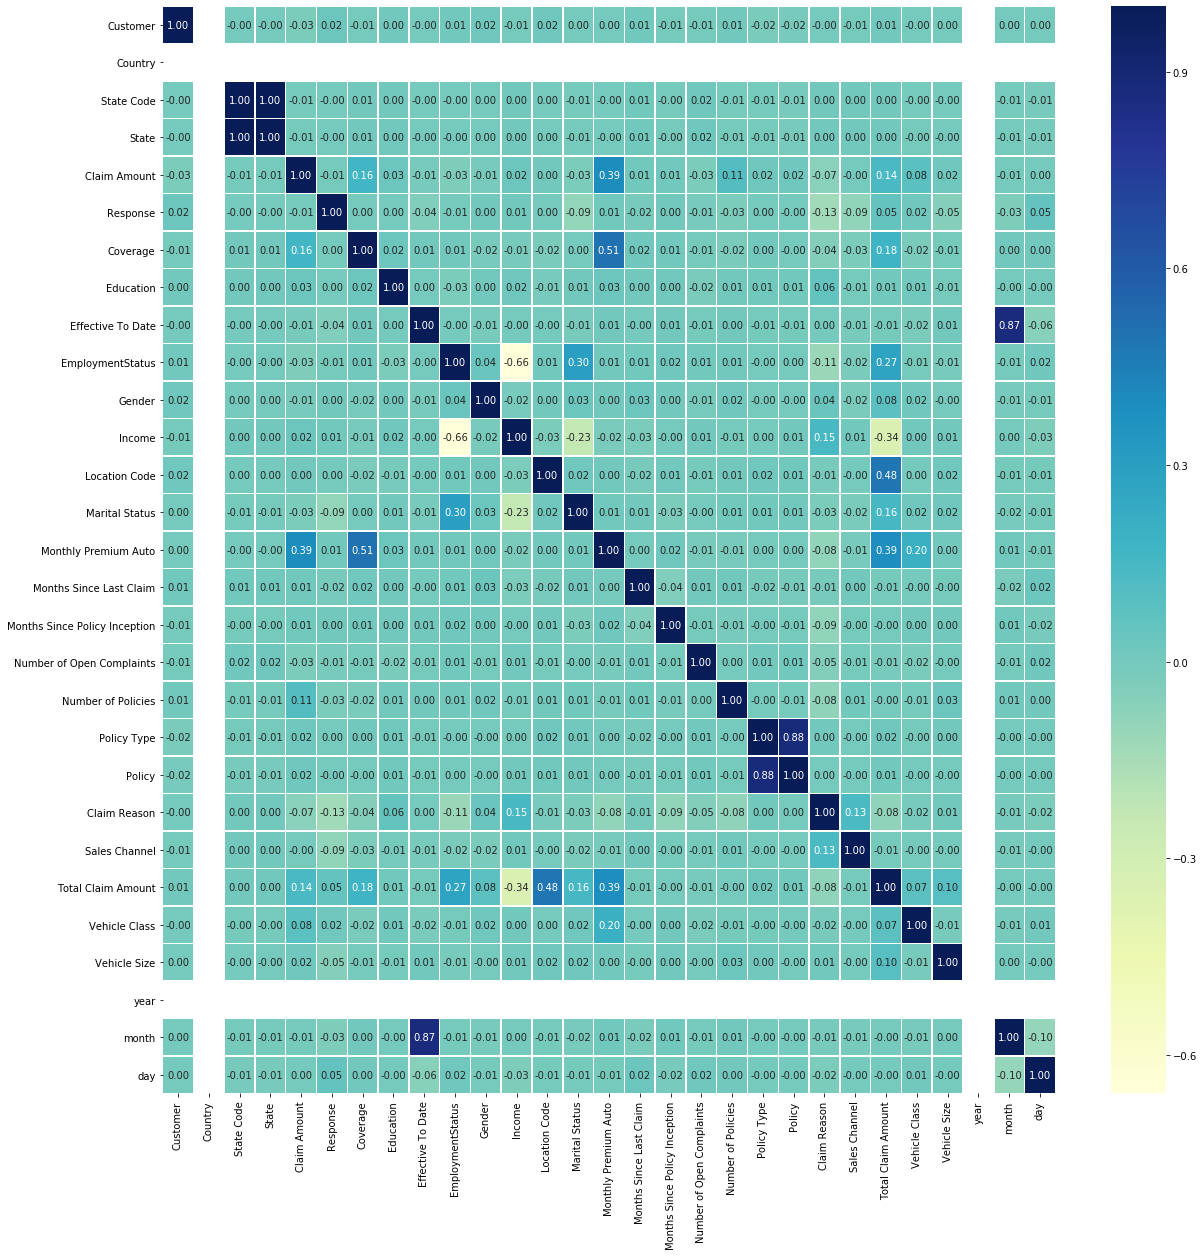

In [53]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [54]:
# Dropping the target value to fit the remaining data into standard scaler 
x1=df.drop(['Claim Amount','Country','State Code','day','Location Code','Sales Channel'],axis=1)
x1
print(x1.shape)

(9134, 23)


In [55]:
# Setting up the Target value in variable y.
y=df['Claim Amount']
y.shape

(9134,)

In [56]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size,year,month
0,-1.504309,-0.550690,-0.408822,-0.770998,-1.124597,1.079814,-0.544213,-0.980269,0.612827,-0.188771,...,-0.473012,-1.013459,-1.735273,-1.119497,-1.074582,0.175809,1.499181,-0.166682,0.0,1.075304
1,0.523180,0.973322,-0.408822,0.968695,-1.124597,-0.271832,1.514006,-0.980269,-1.239617,1.381572,...,-0.473012,1.842561,0.365732,0.748626,1.573530,1.376893,-0.912924,-0.166682,0.0,-0.929969
2,-1.695453,1.735328,-0.408822,1.986350,-1.124597,0.727211,-0.544213,-0.980269,0.365710,-0.188771,...,-0.473012,-0.243541,0.365732,0.748626,-1.074582,0.606185,1.499181,-0.166682,0.0,1.075304
3,1.308235,0.211316,-0.408822,-0.770998,-1.124597,-0.977039,1.514006,1.020128,-1.239617,-0.188771,...,-0.473012,1.618908,-1.735273,-1.742204,-1.074582,0.531839,0.534339,-0.166682,0.0,-0.929969
4,-0.788278,-0.550690,-0.408822,-0.770998,-1.124597,1.373650,-0.544213,1.020128,0.203390,1.381572,...,-0.473012,-1.013459,0.365732,-0.496789,-1.074582,-0.961841,-0.912924,-0.166682,0.0,1.075304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.269080,0.211316,-0.408822,-0.770998,-1.124597,0.198306,-0.544213,1.020128,1.128558,-0.188771,...,-0.473012,-0.243541,0.365732,-0.496789,0.249474,-0.561330,-0.912924,-0.166682,0.0,1.075304
9130,0.312315,0.211316,2.446054,0.968695,-0.400957,0.315840,-0.544213,-0.980269,-0.528450,-1.759114,...,-0.473012,-1.013459,-1.735273,-1.119497,-1.074582,0.159467,-0.912924,-0.166682,0.0,1.075304
9131,0.804586,0.211316,-0.408822,0.968695,-1.124597,1.549952,1.514006,1.020128,-1.239617,1.381572,...,2.753040,-0.243541,-1.735273,-1.742204,-1.074582,0.977728,-0.912924,-0.166682,0.0,1.075304
9132,1.004074,0.211316,-0.408822,0.968695,-0.400957,1.373650,-0.544213,1.020128,-0.517356,-0.188771,...,-0.473012,0.302725,0.365732,0.125919,1.573530,0.827799,-0.912924,-2.027897,0.0,1.075304


# Model Training

In [57]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()

In [58]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state

In [59]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))

#    Creating list to store scores...
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
MAE=[]

# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse)
    print('\n')
#.......Calculating.....Mean_absolute_error.........      
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error :',Meanabsoluteerror)
    MAE.append(Meanabsoluteerror)
    print('\n')

*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 83 is: 0.20331445861002728
Learning Score :  0.4196103427320317
R2 Score :  0.20331445861002728


Cross Val Score :  0.14551076930590362


Mean Squared Error :  424306.0901001243


Root Mean Squared Error :  651.3878185076263


Mean absolute error : 383.06762022502465


*************************** SVR *****************************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


max r2 score corresponding to 0 is: 0
Learning Score :  -0.05046751427923457
R2 Score :  -0.04144292702549457


Cross Val Score :  -0.0479455319899645


Mean Squared Error :  439051.00183264323


Root Mea

In [63]:
#............. DataFrame to show all the calculated scores in one table........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Root_Mean_squared_error':RMSE,'Mean absolute error':MAE})  
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,R2_score,Cross_Val_Score,Root_Mean_squared_error,Mean absolute error
0,KNeighborsRegressor,41.961,20.3314,14.5511,651.388,383.068
1,SVR,-5.04675,-4.14429,-4.79455,662.609,357.853
2,LinearRegression,16.9173,20.3348,16.9649,585.158,385.928
3,DecisionTreeRegressor,100,54.5002,43.3111,482.422,157.654
4,RandomForestRegressor,93.8923,69.8364,67.5688,393.812,153.989
5,GradientBoostingRegressor,72.327,72.2708,68.1407,345.229,162.277
6,AdaBoostRegressor,59.4377,54.9104,31.6991,459.192,258.179
7,Lasso,16.9082,20.3464,16.9945,585.116,386.016
8,Ridge,16.9173,20.335,16.965,585.157,385.929
9,ElasticNet,14.7717,17.9114,15.0602,593.992,392.044


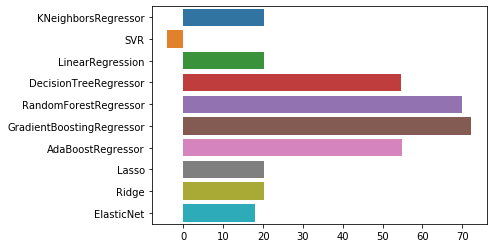

In [64]:
# ..........visualisation of R2_score using Bar Plot..........
sns.barplot(y=Model,x=R2_score)

## Hyper Parameter Tuning

In [65]:
#...........Function of GridSearch to find best parameters and print them ........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(estimator=mod,
                       param_grid=parameters,
                       scoring='r2' ,
                       cv=5,verbose=2,
                       n_jobs=-1)
    
    clf.fit(x_train,y_train)
    print(clf.best_params_)

##### ==> Grid Search for RandomForestRegressor


In [66]:
#.................Grid Search for RandomForestRegressor..........
rf=RandomForestRegressor()
parameters={'n_estimators': [100, 500,700, 1000,2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 30.6min finished


{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 500}


In [68]:
# checking R2 score using best parameters which is calculated from gridsearchCV......
rf=RandomForestRegressor(n_estimators=500,max_depth=None, min_samples_leaf= 2, max_features= 'auto',min_samples_split=4)
max_r2_score(rf)

max r2 score corresponding to 47 is: 0.7335942400848957


47

#####  ==> Grid Search for GradientBoostingRegressor

In [67]:
#.................Grid Search for GradientBoostingRegressor..........
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   28.1s finished


{'learning_rate': 0.01, 'n_estimators': 500}


In [69]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators= 500)
max_r2_score(gbr)

max r2 score corresponding to 87 is: 0.724308014863166


87

##### ==> Grid Search for LGBMRegressor


In [70]:
#.................Grid Search for LGBMRegressor..........
import lightgbm as lgb
lg = lgb.LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="r2")
grid_search.fit(x,y)
grid_search.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=25,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [71]:
#checking r2 score using best parameters and scores which calculated from gridsearchCV
import lightgbm as lgb
lgbr=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=25,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
max_r2_score(lgbr)

max r2 score corresponding to 87 is: 0.7321840016061177


87

## After all this process conclusion is that lightgbm performing well 

In [72]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

In [73]:
#lets make our final model
import lightgbm as lgb
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20,random_state=87)
lgbr=lgb.LGBMRegressor(silent=False,learning_rate=0.01 ,max_depth=25, n_estimators= 200, num_leaves=300)
lgbr.fit(x_train, y_train)
y_predlgbr = lgbr.predict(x_test)
evaluate_preds(y_test,y_predlgbr)

r2score: 73.22%
Mean absolute error: 159.72
Mean squared error: 115110.39
Root Mean squared error: 339.28


{'r2score': 0.73,
 'Mean absolute error': 159.72,
 'Mean squared error': 115110.39,
 'Root Mean squared error': 339.28}

Text(0, 0.5, 'Predicted Y')

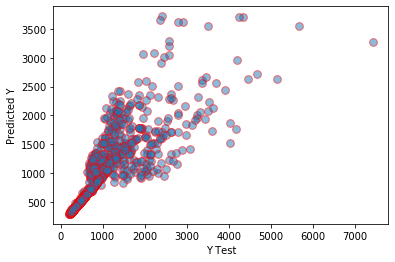

In [74]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predlgbr,marker="o",edgecolors ="r",s=60,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [75]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predlgbr})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
8330,288.316541,358.310602
1246,333.144563,397.395514
5299,490.902749,530.805515
1021,515.607265,554.004980
2512,222.707275,302.371871
...,...,...
73,678.127020,716.234135
5070,626.534330,637.502563
1549,663.083609,843.987540
7634,726.161548,720.426455


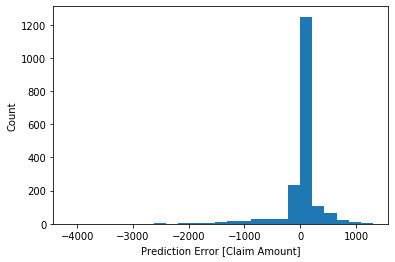

In [77]:
#lets visualize the error
error = y_predlgbr - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Claim Amount]")
_ = plt.ylabel("Count")

In [78]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_predlgbr)
df1.to_csv('Project_16_Auto_Insurance_claim.csv',index=False)

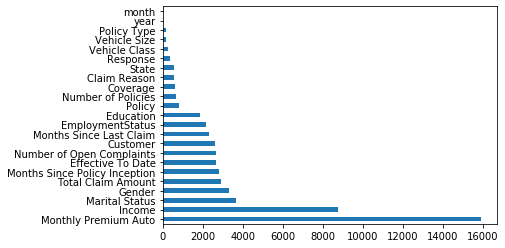

In [79]:
feat_importances = pd.Series(lgbr.feature_importances_, index=x_train.columns)
feat_importances.nlargest(40).plot(kind='barh')

In [80]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(lgbr,'Project_16_Auto_Insurance_claim.pkl')

['Project_16_Auto_Insurance_claim.pkl']

## Conclusion:              

1) All the persons are from US only.                
2) More number of claims are from Missouri stae.                    
3) Number of Counts of Basic Coverage are more than Extended and Premium coverage.                          
4) Number of counts of Persons have Education= 'Bachelor' are more.            
5) Number of counts of persons whose Employement Status is 'Employed'         
6) Number of Female counts is more.           
7) Number of counts for Suburban location code is more thamn rest.              
8) Where Martial Status is Married, Number of Counts of Persons is more.               
9) As 'Months since Last claim' increases number of person counts decreases.
10) Insurance claimers decreases as number of policies increases.            
11) People chose Personal Auto policy more than rest.             
12) Policy L3 have more number of customers.               
13) More number of Persons mainly claims due to 'collision'                 
14) More number of persons Take policies via Agents.             
15) More number of persons take claim for 'Four-Door-Car'.              
16) More number of persons claims for medsize vehicle.              
17) Oklohama state person's claims more amount.          
18) Premium Coverage have more claim amount.               
19) Education= 'High School or below' have more claim amount.                 
20) Employed persons have more claim Amount.                        
21) Females have more claim Amount.                
22) Urban location have more claim amount.            
23) Divorcees have more claim amount.              
24) As monthly Premium Auto Increases Claim Amount also Increases.                  
25) As 'Months since Last claim' increases claim amount also increases.           
26) Claim Amount decreases as number of Open Complaints increases.                
27) Special L3 Auto have more claim amount.          
28) Call Centres sales chanel have more claim amount.          
29) small vehicle size have more claim amount.                 

## Steps Followed:                              
1) Understanding Data.                          
2) EDA Analysis.                                                      
3) Best parameters are found using Gridsearch cv and applied to models.              
4) Best parameters are applied to each models and machine is trained for each models to find Best R2 Score, Cross val score, mean squared error and root mean square error.                         
5) A Result table is made comprises of r2, cross_val score, mean squared error and root mean square error of each model.   
6) lightgbm is used to train the model finally as it's r2_score is best and error is less among the rest of the models.        
7) Predicted values are saved in Project_16_Auto_Insurance_claim.csv file.                  
8) Pickle file is named with Project_16_Auto_Insurance_claim.pkl file     